# Data Science Portfolio 1#
Repository containing portfolio of data science projects completed by me for self learning. Presented in the form of jupyter Notebooks.

## Electronic Product Price Elasticity Project -
This portfolio main purpose is to analyze price data in the sense of analyzing the impact of different pricing data through time in various e-commerce platforms and measure the impression demand for brands that are direct competitors among different electronic products.

i.e. Does impression demand of competitor X increases if competitor Y increase their prices in the same or similar electronic products within a timeframe? Does free shipping boost impressions in electronic products? if yes, which products tend to have better results?

To be continued...


Electronic Product Price Elasticity Project - 

Ileana Cabada

About the dataset
The dataset used can be found at Kaggle and was created by Datafiniti. It contains several electronic products organized by ID and variables related to them: store, regular price , discounted price, product description, etc.
https://www.kaggle.com/datafiniti/electronic-products-prices

Data Variables

    Name          Product Name
    p_description Product Description
    Brand         Product Brand
    Condition     Product Condition (condition filtered by used, refurbished, new, None added Part 1.0)
    Currency      Price Currency
    dateseen      Collection of all dates seen in an specific product
    Imp_Count     Impresion Count per product
    Imp_Date      Impression dateseen (added in Part 2.0)
    isSale        Price on Sale (isSale checked in Part 1.0)
    Merchant      Vendor
    Price         Original Price
    Price_disc    Price with discount
    Shipping      Shipping cost
    kmeans_labels Cluster labels by product description (added in Part 1.1)
    
    


**Part 1 Data Cleaning and Preprocessing**

<font color='red'>1.1 Data Cleaning </font>

- Manage Null values
- Normalize Data (Condition and Shipping type label cleaning)
- Deleted non-used columns
- Filtered USD price products
 
<t><font color='red'>1.2 Unsupervised Unlabelled Product Text Classification with TDIF Vectorizing and Kmeans</font>



This model is applied due that category labels (**i.e. tablets, headphones**) are not in the dataset as a result product description variable is taken in order to transform it to a solid group category


- TIFD Vectorizer and Kmeans Clustering
- Optimal number of clusterings testing by Elbow and Silouhette Coefficient Score
- Kmeans fit and transform
- Result visualization 
           
           **for more information about TIFD text vectorizer over Count vectorizer please read (THIS PAGE)**
           
 **kmeans_labels: Cluster labels by product description (added in Part 1.1)**
 
 
 <font color='red'>2.0 Exploratory Data Analysis</font>

 
 

           
 
           





    

In [1]:
#All model library
import pandas as pd
import numpy as np
import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

#import warnings; warnings.filterwarnings(action='once')
from IPython.display import display, HTML, Image

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# <center>Part 1 <center> Data Cleaning and Preprocessing </center> #

In [2]:
import pandas as pd
import numpy as np
import datetime
import math
import matplotlib.pyplot as plt
import re
import seaborn as sns
from IPython.display import display, HTML, Image

In [3]:
pricing_data = 'DatafinitiElectronicsProductsPricingData.csv'
df = pd.read_csv (pricing_data)
pd.options.display.width = 0

## <center>Part 1.1 <center> Data Cleaning </center> ##

In [4]:
print("Dataframe Dimensions:",df.shape)
pd.set_option('display.max_columns', 500)

Dataframe Dimensions: (14592, 31)


In [5]:

# gives some infomation on columns types and number of null values
tab_info = pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
print ('-' * 10 + " Display information about column types and number of null values " + '-' * 10 )
print 
display(tab_info)

---------- Display information about column types and number of null values ----------


id prices.amountMax prices.amountMin  \
column type       object          float64          float64   
null values (nb)       0                0                0   
null values (%)        0                0                0   

                 prices.availability prices.condition prices.currency  \
column type                   object           object          object   
null values (nb)                1925             1403               0   
null values (%)              13.1922          9.61486               0   

                 prices.dateSeen prices.isSale prices.merchant  \
column type               object          bool          object   
null values (nb)               0             0             772   
null values (%)                0             0         5.29057   

                 prices.shipping prices.sourceURLs   asins   brand categories  \
column type               object            object  object  object     object   
null values (nb)            5799                 0       0       0          0   
null values (%)           39.741                 0       0       0          0   

                 dateAdded dateUpdated      ean imageURLs    keys  \
column type         object      object   object    object  object   
null values (nb)         0           0    10384         0       0   
null values (%)          0           0  71.1623         0       0   

                 manufacturer manufacturerNumber    name primaryCategories  \
column type            object             object  object            object   
null values (nb)         6974                  0       0                 0   
null values (%)       47.7933                  0       0                 0   

                 sourceURLs     upc  weight Unnamed: 26 Unnamed: 27  \
column type          object  object  object      object      object   
null values (nb)          0       0       0       14553       14574   
null values (%)           0       0       0     99.7327     99.8766   

                 Unnamed: 28 Unnamed: 29 Unnamed: 30  
column type          float64      object      object  
null values (nb)       14586       14580       14586  
null values (%)      99.9589     99.9178     99.9589

In [6]:
#Drop columns that are not going to be used for the project
df = df[df.columns.drop(['sourceURLs','prices.availability','asins','manufacturerNumber','upc', 'primaryCategories','keys','id','ean'])]
#Drop columns that started with Unnamed
df = df[df.columns.drop(list(df.filter(regex='Unnamed*')))]

#Change name of columns
columns_to_change = {}
for column in df.columns:
    if column.startswith("prices."):
        columns_to_change[column] = column[7:]
df.rename(columns=columns_to_change, inplace=True)
df.rename(columns = {'amountMax':'price', 'amountMin':'disc_price','categories':'p_description'}, inplace = True) 

In [7]:
df.columns

Index(['price', 'disc_price', 'condition', 'currency', 'dateSeen', 'isSale',
       'merchant', 'shipping', 'sourceURLs', 'brand', 'p_description',
       'dateAdded', 'dateUpdated', 'imageURLs', 'manufacturer', 'name',
       'weight'],
      dtype='object')

In [8]:
#Doublecheck Sale Prices
df['isSale'] = np.where(df['price']> df['disc_price'],"Yes", "No")

# Text Normalization (Product Condition, Merchant Website and Shipping method)

In [9]:
#Filtered Product Condition by Used, New and Refurbished
condition= df['condition'].fillna('None')
df['condition'] = pd.np.where(condition.str.contains('new', flags=re.IGNORECASE), "New",
                           pd.np.where(condition.str.contains('refurbished',flags=re.IGNORECASE), "Refurbished", 
                           pd.np.where(condition.str.contains('pre-owned|used',flags=re.IGNORECASE), "Used",condition)))
                  
c = df['condition'].value_counts()
print("Product Condition Percentage\n{}\n{}\nProduct Condition values count\n{}\n{}".format(
      50*"-", c / len(df.index) * 100, 50*"-", c))

Product Condition Percentage
--------------------------------------------------
New                         85.649671
None                         9.614857
Used                         3.125000
Refurbished                  1.576206
For parts or not working     0.034265
Name: condition, dtype: float64
Product Condition values count
--------------------------------------------------
New                         12498
None                         1403
Used                          456
Refurbished                   230
For parts or not working        5
Name: condition, dtype: int64


In [10]:
# for the Merchants accuracy, we will use the source URL to include the correct merchant
#df['sourceURLs'][(df['merchant']== 'Not Specified') | (df['merchant']== 'Other')]
merchant_ab= df['sourceURLs']
df['merchant'] = pd.np.where(merchant_ab.str.contains('bhphotovideo', flags=re.IGNORECASE), "bhphotovideo.com",
                 pd.np.where(merchant_ab.str.contains('eBay|e bay', flags=re.IGNORECASE), "ebay.com",
                 pd.np.where(merchant_ab.str.contains('Amazon',flags=re.IGNORECASE), "Amazon.com", 
                 pd.np.where(merchant_ab.str.contains('Bestbuy',flags=re.IGNORECASE), "Bestbuy.com",
                 pd.np.where(merchant_ab.str.contains('Homedepot',flags=re.IGNORECASE), "homedepot.com",
                 pd.np.where(merchant_ab.str.contains('newegg',flags=re.IGNORECASE), "newegg.com",
                 pd.np.where(merchant_ab.str.contains('kmart',flags=re.IGNORECASE), "kmart.com",
                 pd.np.where(merchant_ab.str.contains('frys',flags=re.IGNORECASE), "frys.com",
                 pd.np.where(merchant_ab.str.contains('cdw',flags=re.IGNORECASE), "cdw.com",
                 pd.np.where(merchant_ab.str.contains('target',flags=re.IGNORECASE), "target.com",
                 pd.np.where(merchant_ab.str.contains('overstock',flags=re.IGNORECASE), "overstock.com",
                 pd.np.where(merchant_ab.str.contains('barcodable',flags=re.IGNORECASE), "barcodable.com",
                 pd.np.where(merchant_ab.str.contains('kohls',flags=re.IGNORECASE), "kohls.com",
                 pd.np.where(merchant_ab.str.contains('sears',flags=re.IGNORECASE), "sears.com",
                 pd.np.where(merchant_ab.str.contains('Wal-mart|Walmart',flags=re.IGNORECASE), "Walmart.com","Other")))))))))))))))

In [11]:
m = df['merchant'].value_counts()
print("Merchant Percentage\n{}\n{}\nMerchant values count\n{}\n{}".format(
      50*"-", m / len(df.index) * 100, 50*"-", m))

Merchant Percentage
--------------------------------------------------
Bestbuy.com         30.838816
Walmart.com         25.479715
bhphotovideo.com    18.893914
ebay.com            14.624452
Amazon.com           7.147752
target.com           0.842928
frys.com             0.507127
barcodable.com       0.322094
newegg.com           0.308388
cdw.com              0.294682
Other                0.260417
homedepot.com        0.157621
kmart.com            0.123355
kohls.com            0.075384
sears.com            0.068531
overstock.com        0.054825
Name: merchant, dtype: float64
Merchant values count
--------------------------------------------------
Bestbuy.com         4500
Walmart.com         3718
bhphotovideo.com    2757
ebay.com            2134
Amazon.com          1043
target.com           123
frys.com              74
barcodable.com        47
newegg.com            45
cdw.com               43
Other                 38
homedepot.com         23
kmart.com             18
kohls.com           

Our data shows the date that an advertisment with specific price was seen, often named this action in tech companies and marketing as impressions. 
With the main purpose to do further analysis in price elasticities model by date, each row is extended by dateseen (impression_date).

In [12]:
print("Dataframe Dimensions without date impressions rows:", df.shape)
display(df[['name','dateSeen']][:5])

Dataframe Dimensions without date impressions rows: (14592, 17)


name  \
0  Sanus VLF410B1 10-Inch Super Slim Full-Motion ...   
1  Boytone - 2500W 2.1-Ch. Home Theater System - ...   
2  Boytone - 2500W 2.1-Ch. Home Theater System - ...   
3  Boytone - 2500W 2.1-Ch. Home Theater System - ...   
4  Boytone - 2500W 2.1-Ch. Home Theater System - ...   

                                            dateSeen  
0  2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...  
1                               2017-12-14T06:00:00Z  
2                               2017-09-08T05:00:00Z  
3                               2017-10-10T05:00:00Z  
4                               2017-08-28T07:00:00Z

In [13]:
#Split dates for further individual row processing as df['Date_imp] column, add count of impressions per product as df['Imp_count']
time_scratch=[]
date_count=[]

for i in df['dateSeen']:
    time_= i.split(",")
    time_scratch.append(time_)
    date_count.append(len(time_))
                      
df['Imp_count']= date_count                     
df['Date_imp'] = time_scratch

In [14]:
#Impressions by date expansion
def explode(df, lst_cols, fill_value='', preserve_index=False):
    # make sure `lst_cols` is list-alike
    if (lst_cols is not None
        and len(lst_cols) > 0
        and not isinstance(lst_cols, (list, tuple, np.ndarray, pd.Series))):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)
    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()
    # preserve original index values    
    idx = np.repeat(df.index.values, lens)
    # create "exploded" DF
    res = (pd.DataFrame({
                col: np.repeat(df[col].values, lens)
                for col in idx_cols},
                index=idx)
             .assign(**{col:np.concatenate(df.loc[lens>0, col].values)
                            for col in lst_cols}))
    # append those rows that have empty lists
    if (lens == 0).any():
        # at least one list in cells is empty
        res = (res.append(df.loc[lens==0, idx_cols], sort=False)
                  .fillna(fill_value))
    # revert the original index order
    res = res.sort_index()
    # reset index if requested
    if not preserve_index:        
        res = res.reset_index(drop=True)
    return res


df = explode(df , ['Date_imp'], fill_value='')


**Add Month, day, weeknumber, day of the week for further analysis separately **

In [15]:
#Convert df['Date_imp'] to Datetime
df['Date_imp']= pd.to_datetime(df['Date_imp'], errors='coerce')
df['Date_imp_d']= df['Date_imp'].dt.strftime('%Y/%m/%d')
df['Day_n']= df['Date_imp'].dt.strftime('%A')
df['year']= df['Date_imp'].dt.year
df['month']= df['Date_imp'].dt.month
df['month_n']= df['Date_imp'].dt.strftime('%B')
df['day']= df['Date_imp'].dt.day
df['Week_Number'] = df['Date_imp'].dt.week
#( Check weekday) df['WeekDay'] = df['Date_imp'].dt.weekday


print("Dataframe dimensions with impressions:" ,df.shape)


Dataframe dimensions with impressions: (43238, 26)


In [16]:
df[['Date_imp','Date_imp_d','Day_n','month_n']][:5]

Date_imp  Date_imp_d     Day_n   month_n
0 2017-03-30 06:00:00  2017/03/30  Thursday     March
1 2017-03-10 22:00:00  2017/03/10    Friday     March
2 2017-03-04 10:00:00  2017/03/04  Saturday     March
3 2017-03-03 14:00:00  2017/03/03    Friday     March
4 2017-12-14 06:00:00  2017/12/14  Thursday  December

In [17]:
df.head(2)

Imp_count  brand condition currency             dateAdded  \
0          4  Sanus       New      USD  2015-04-13T12:00:51Z   
1          4  Sanus       New      USD  2015-04-13T12:00:51Z   

                                            dateSeen           dateUpdated  \
0  2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...  2018-05-12T18:59:48Z   
1  2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...  2018-05-12T18:59:48Z   

   disc_price                                          imageURLs isSale  \
0      104.99  https://images-na.ssl-images-amazon.com/images...     No   
1      104.99  https://images-na.ssl-images-amazon.com/images...     No   

  manufacturer     merchant  \
0          NaN  Bestbuy.com   
1          NaN  Bestbuy.com   

                                                name  \
0  Sanus VLF410B1 10-Inch Super Slim Full-Motion ...   
1  Sanus VLF410B1 10-Inch Super Slim Full-Motion ...   

                                       p_description   price shipping  \
0  Audio & Video Accessories,TV Mounts,TV Accesso...  104.99      NaN   
1  Audio & Video Accessories,TV Mounts,TV Accesso...  104.99      NaN   

                                          sourceURLs       weight  \
0  http://www.bestbuy.com/site/sanus-tv-wall-moun...  32.8 pounds   
1  http://www.bestbuy.com/site/sanus-tv-wall-moun...  32.8 pounds   

             Date_imp  Date_imp_d     Day_n  year  month month_n  day  \
0 2017-03-30 06:00:00  2017/03/30  Thursday  2017      3   March   30   
1 2017-03-10 22:00:00  2017/03/10    Friday  2017      3   March   10   

   Week_Number  
0           13  
1           10

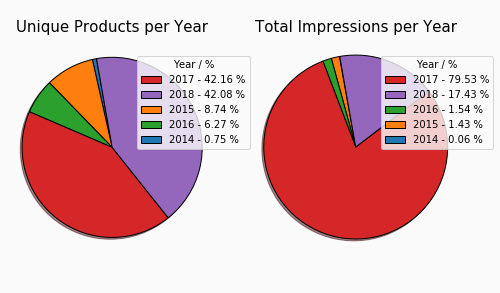

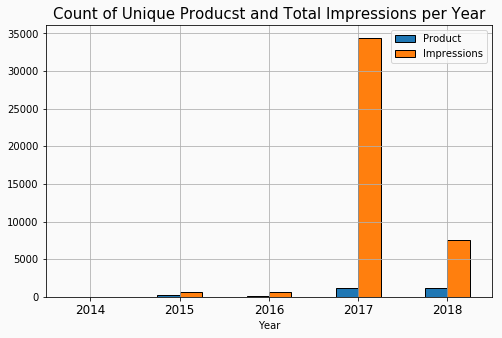

In [18]:
#Setting background color for all graphs
bg_color = (0.98,0.98,0.98)
plt.rcParams['figure.facecolor'] = bg_color
plt.rcParams['axes.facecolor'] = bg_color

#Create impressions pie chart data frame
pie_prod = df.groupby('year').agg({'name':'nunique','Date_imp':'count'}).reset_index()
pie_prod = pie_prod.rename(columns = {'year':'Year','name':'Product', 'Date_imp':'Impressions'})
x = pie_prod['Year']
unique_prod = pie_prod['Product']
Imp_count = pie_prod['Impressions']
percent_unique = 100.*unique_prod/unique_prod.sum()
percent_imp = 100.*Imp_count/Imp_count.sum()



plt.rcParams['figure.figsize'] = [8, 5]
plt.subplot(121)
patches, texts = plt.pie(unique_prod  ,startangle=100, shadow = True, wedgeprops={"edgecolor":"k",'linewidth': 1, 'antialiased': True})
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent_unique)]
sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, unique_prod),
                                          key=lambda x: x[2],
                                          reverse=True))
plt.legend(patches, labels, loc='upper center', title = 'Year / %', bbox_to_anchor = (.9, .85),
           fontsize = 10)
    
plt.title('Unique Products per Year',fontsize = 15, y=.9)
plt.axis('equal')

plt.subplot(122)
patches, texts = plt.pie(Imp_count , startangle=100, shadow = True, wedgeprops={"edgecolor":"k",'linewidth': 1, 'antialiased': True})
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent_imp)]
sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, Imp_count),
                                          key=lambda x: x[2],
                                          reverse=True))
plt.legend(patches, labels, loc='upper center', title = 'Year / %', bbox_to_anchor = (.9, .85),
           fontsize = 10)
plt.title('Total Impressions per Year',fontsize = 15, y=.9)
plt.axis('equal')
plt.show()


pie_prod.plot.bar(x ='Year', rot=0, grid = True, edgecolor='k')
plt.title('Count of Unique Producst and Total Impressions per Year', fontsize=15)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=10)
plt.show()

In previous charts, we can vizualize that about 80% of the impressions in the dataset ocurred in 2017. For this main reason our analysis would cover only year 2017

In [19]:
#Select only 2017 Impressions for analysis
df = df[df['year'] == 2017]
print("New DataFrame Dimensions with only 2017 Impressions:",len(df))

New DataFrame Dimensions with only 2017 Impressions: 34389


In [20]:
#Add Discount percentage of products with impressions
df['Disc_percentage']= round(1-(df['disc_price']/df['price']),2)

In [21]:

# gives some infomation on columns types and number of null values and unique values 
summary_tab = pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
summary_tab= summary_tab.append(pd.DataFrame(df.nunique()).T.rename(index={0:'Unique Values'}))
summary_tab= summary_tab.append(pd.DataFrame(df.count()).T.rename(index={0:'Total Count'}))
summary_tab= summary_tab.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
summary_tab = summary_tab.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename(index={0:'null values (%)'}))
print ('-' * 10 + " Display information about column types and number of null values, unique values and total count" + '-' * 10 )
print 
display(summary_tab)

---------- Display information about column types and number of null values, unique values and total count----------


Imp_count   brand condition currency dateAdded dateSeen  \
column type          int64  object    object   object    object   object   
Unique Values           54     296         5        5      1077     5785   
Total Count          34389   34389     34389    34389     34389    34389   
null values (nb)         0       0         0        0         0        0   
null values (%)          0       0         0        0         0        0   

                 dateUpdated disc_price imageURLs  isSale manufacturer  \
column type           object    float64    object  object       object   
Unique Values            983       3697      1142       2          266   
Total Count            34389      34389     34389   34389        18638   
null values (nb)           0          0         0       0        15751   
null values (%)            0          0         0       0      45.8024   

                 merchant    name p_description    price shipping sourceURLs  \
column type        object  object        object  float64   object     object   
Unique Values          13    1129          1118     3546      131       6415   
Total Count         34389   34389         34389    34389    16111      34389   
null values (nb)        0       0             0        0    18278          0   
null values (%)         0       0             0        0  53.1507          0   

                  weight        Date_imp Date_imp_d   Day_n   year  month  \
column type       object  datetime64[ns]     object  object  int64  int64   
Unique Values        748            2217        270       7      1     12   
Total Count        34389           34389      34389   34389  34389  34389   
null values (nb)       0               0          0       0      0      0   
null values (%)        0               0          0       0      0      0   

                 month_n    day Week_Number Disc_percentage  
column type       object  int64       int64         float64  
Unique Values         12     31          51              74  
Total Count        34389  34389       34389           34389  
null values (nb)       0      0           0               0  
null values (%)        0      0           0               0

## <center>Part 1.2 <center>Unsupervised Unlabelled Product Category Text Classification with TDIF Vectorizing and Kmeans </center> ##

In [22]:
import pandas as pd
import numpy as np
import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from wordcloud import WordCloud

#import warnings; warnings.filterwarnings(action='once')
from IPython.display import display, HTML, Image

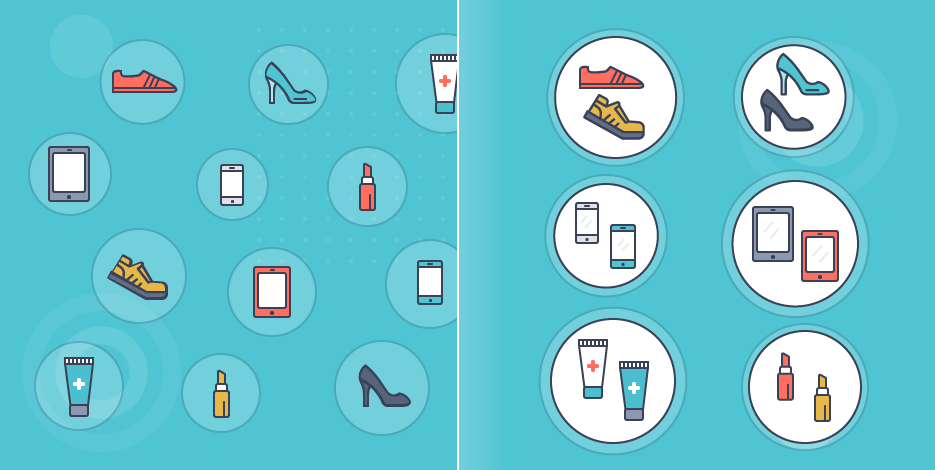

In [23]:
im1 = Image(filename = 'clustering_words.png', width = 800, height = 100)
display(im1)


### 1.2.1- Why an unsupervised texting model?


In our dataset we do not count with the category label or any label related to a solid group that would allow us to apply a supervised learning model. For this main reason, an unsupervised model **(Kmeans clustering)** is executed for text classification 


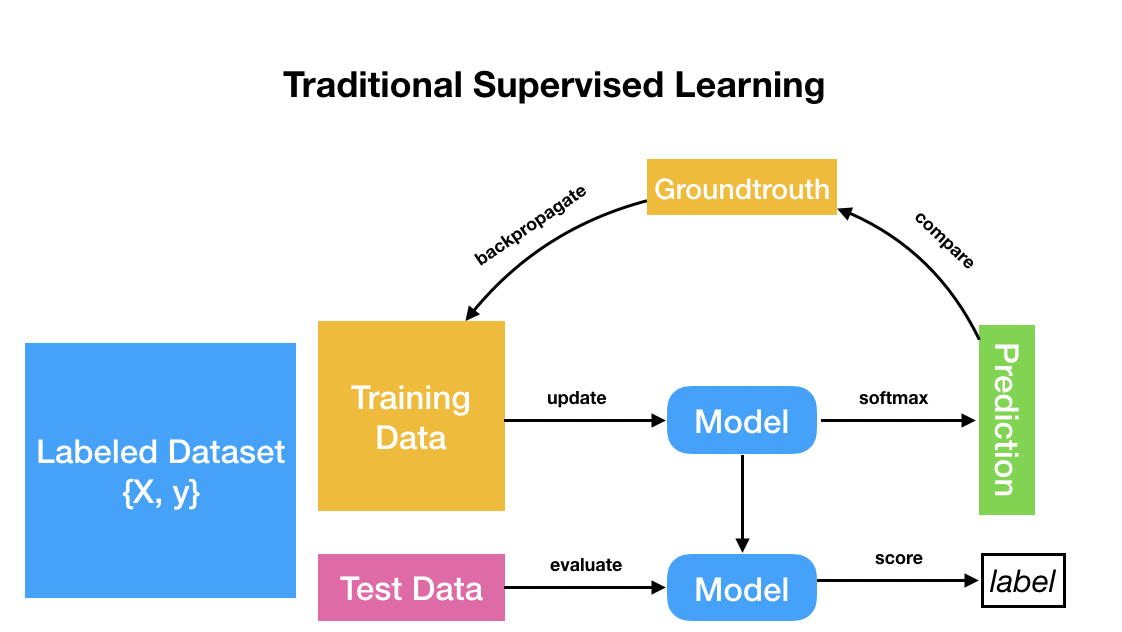

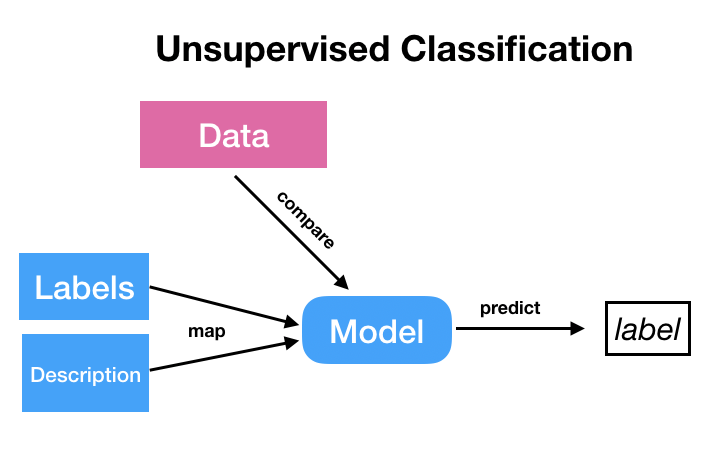

In [24]:
im2 = Image(filename= 'Git1.png', width=400, height=400)
im3 = Image(filename= 'Git2.png' ,width=400, height=400)
display(im2,im3)

Following we selected only the unique name and product description variables in order to reduce the computational effort to extract the information from a text and introduced to the kmeaans model

In [25]:
df_clust = df[['name','p_description']].drop_duplicates()

In [26]:
print ('-' * 10 + " DataFrame used for Unsupervised Texting Clustering for Product Labelling (p_description) " + '-' * 10 )
display(df_clust.head(10))

---------- DataFrame used for Unsupervised Texting Clustering for Product Labelling (p_description) ----------


name  \
0    Sanus VLF410B1 10-Inch Super Slim Full-Motion ...   
4    Boytone - 2500W 2.1-Ch. Home Theater System - ...   
31   DENAQ - AC Adapter for TOSHIBA SATELLITE 1700 ...   
50   DreamWave - Tremor Portable Bluetooth Speaker ...   
69   NS-SP1800BL 5.1-Channel Home Theater System (B...   
97   Universal Remote Control - 48-Device Universal...   
135  Acoustimass 6 Series V Home Theater Speaker Sy...   
160  Corsair Vengeance LPX 16GB (2x8GB) DDR4 DRAM 3...   
171        Outdoor Tech Buckshot Pro Bluetooth Speaker   
211                    Motorola Wi-Fi Pet Video Camera   

                                         p_description  
0    Audio & Video Accessories,TV Mounts,TV Accesso...  
4    Stereos,Portable Bluetooth Speakers,TV, Video ...  
31   Computers,Office,Computer Accessories,Computer...  
50   Portable Bluetooth Speakers,Bluetooth & Wirele...  
69   Surround Speakers,Electronics Features,Surroun...  
97   Audio & Video Accessories,Remote Controls,Elec...  
135  Surround Speakers,TV, Video & Home Audio,Surro...  
160  Computers,Memory (RAM),Computers & Accessories...  
171  Bluetooth & Wireless Speakers,Portable Audio &...  
211  Electronics,Cameras & Camcorders,All Camcorder...

In [27]:
print("Unsupervised Texting Clustering for Product Labelling Dataframe Dimensions:",df_clust.shape)
print("Null Values Check:" , df_clust.isnull().sum())

Unsupervised Texting Clustering for Product Labelling Dataframe Dimensions: (1145, 2)
Null Values Check: name             0
p_description    0
dtype: int64


### Text preprocessing phase 

**Text Normalization**

**Lemmatization** is similar to stemming but it brings context to the words. So it links words with similar meaning to  one word.Lemmatization is preferred over Stemming because lemmatization does morphological analysis of the words.

Source:https://www.geeksforgeeks.org/python-lemmatization-with-nltk/
    
**Tokenization**



In [28]:
lemmatizer = WordNetLemmatizer() 

#Text Tokenization and normalization 

new_words = []

for corpus in df_clust['p_description']:
    corpus = re.sub(r'[^\w\s]', ' ', corpus)
    corpus= corpus.replace("&", "")
    new_words.append(corpus.lower())

In [29]:
#Tokenize words with word_tokenize from nltk
df_clust['clust1'] = new_words  

#tokens = new_words.map(word_tokenize).values
df_clust['clust1'] = df_clust['clust1'].map(word_tokenize).values

In [30]:
#Here we dont delete the duplicates in each row or product description in order to analyze the TFID and see the score of the kmeans clustering 

lemmatizer = WordNetLemmatizer() 
stop_words = set(stopwords.words('english'))

lemonly_words = []
for clust2 in df_clust['clust1']:
    #clust2= list(set(clust2))
    lemmatized_word =[]
    for word in clust2:
        if word not in stop_words:
            lemmatized_word.append(lemmatizer.lemmatize(word))
    lemonly_words.append(list(lemmatized_word))
df_clust['clust_lemmt'] = lemonly_words

### WordCloud with Lemmatized Word Frequency Distribution

(-0.5, 2999.5, 1999.5, -0.5)

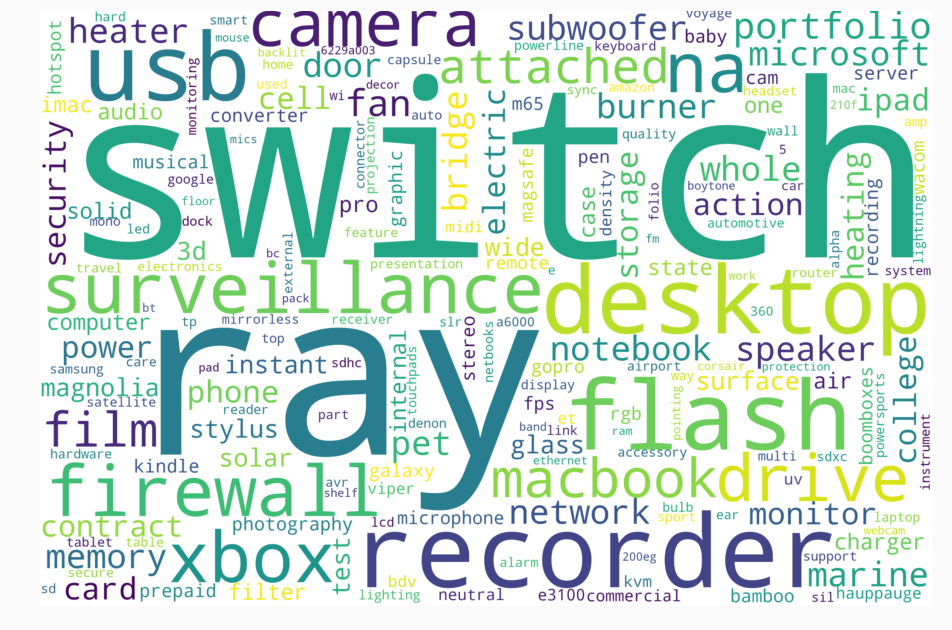

In [31]:
wordcloud_col = []
#Wordcloud preprocessing data
for individual_words in df_clust['clust_lemmt']:
     wordcloud_col.append(" ".join(individual_words))
df_clust['process'] = wordcloud_col

#Word cloud dataframe
cluster_count = df_clust.groupby('name')['process'].apply(lambda x: nltk.FreqDist(nltk.tokenize.word_tokenize(' '.join(x))))
cluster_count = pd.DataFrame(cluster_count).reset_index()
cluster_count = cluster_count.rename(columns = {'level_1': 'Word', 'word_cloud': 'Count'})
word_cloud = cluster_count.groupby('Word')['process'].sum().reset_index()

#Dictionary with word frequency for wordcloud
word_dict = dict(zip(cluster_count.Word, cluster_count.process))

#Wordcloudplot 
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white').generate_from_frequencies(word_dict)
fig = plt.figure(figsize=(16,13),
     facecolor = bg_color,
     edgecolor = bg_color)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

### TF-IDF Vectorizer  

In order to perform machine learning on text, we need to transform our documents into vector representations such that we can apply numeric machine learning. This process is called feature extraction or more simply, vectorization, and is an essential first step toward language-aware analysis.

To achieve that, Tf-idf Vectorizer provided better results than CountVectorizer. For more information please refer to article CountVectorizer VS Tf-idf Vectorizer
 
 - TF-IDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word or n-gram is to a document in a collection or corpus. They provide weighting to a given word based on the frequency that the n-gram occurs in all vectors. However even though tf-idf BoW representations provide weights to different words they are unable to capture the word meaning. 
In addition, Occurrence count is a good start but there is an issue: longer documents will have higher average count values than shorter documents, even though they might talk about the same topics.To avoid these potential discrepancies it suffices to divide the number of occurrences of each word in a document by the total number of words in the document.
 

Source: https://towardsdatascience.com/beyond-word-embeddings-part-2-word-vectors-nlp-modeling-from-bow-to-bert-4ebd4711d0ec
 

In [33]:
#TFID Vectorizer from preprocessed text
vect = TfidfVectorizer(preprocessor=' '.join, stop_words = 'english', lowercase = False)  
matrix = vect.fit_transform(lemonly_words)

### Optimal Clusters for Kmeans Modeling  

    (Elbow and Silohuette Average Score)


**Elbow Method**
Using the Elbow Method, the algorithm estimates the center of each cluster, then measures the average distance each point in the cluster is from the center. Taking the average of these distances gives us the Within-Cluster-Sum of Squared Errors (WCSS). We can plot the WCSS as the number of clusters increases, looking for the point where the WCSS levels off.

**Silhouette Coefficient**
The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.

Source:https://scikit-learn.org/


By calculating Euclidean distance a(or cosine similarity) between two word vectors provides an effective method for measuring the linguistic or semantic similarity of the corresponding words


Silohuette Results explanation

Best 1 and worst -1

- If it is 0   Indicate overlapping clusters
- If it is 1   The sample is far away from the neighboring clusters.
- If it is -1  Generally indicate that a sample has been assigned to the wrong cluster

Following, optimal number of clusters were extracted with Elbow and Silohuette average score. 
Optimal clusters fed the kmeans model 

Optimal number of clusters: 58 with silohuette average of: 0.3044940525975539
Elbow Score: 344.48364979736186


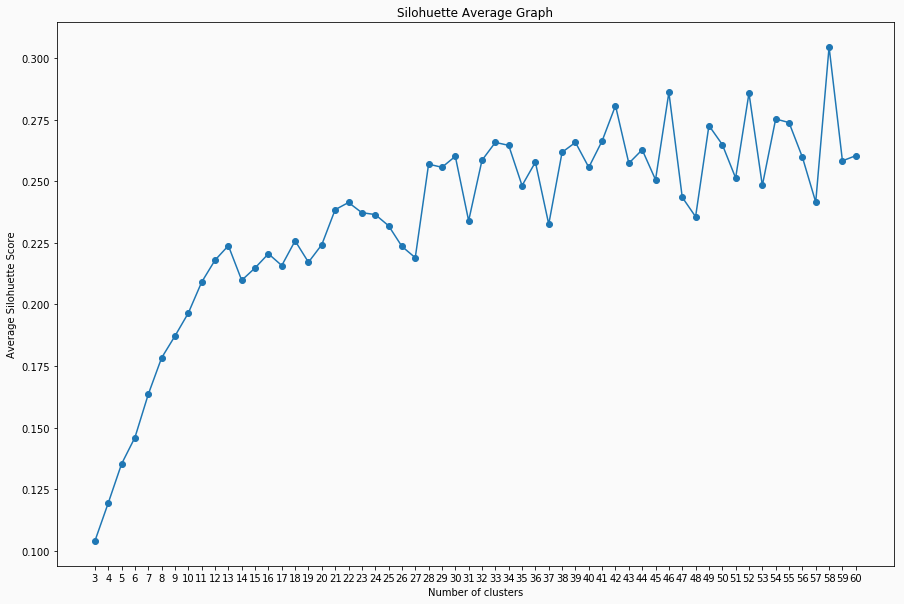

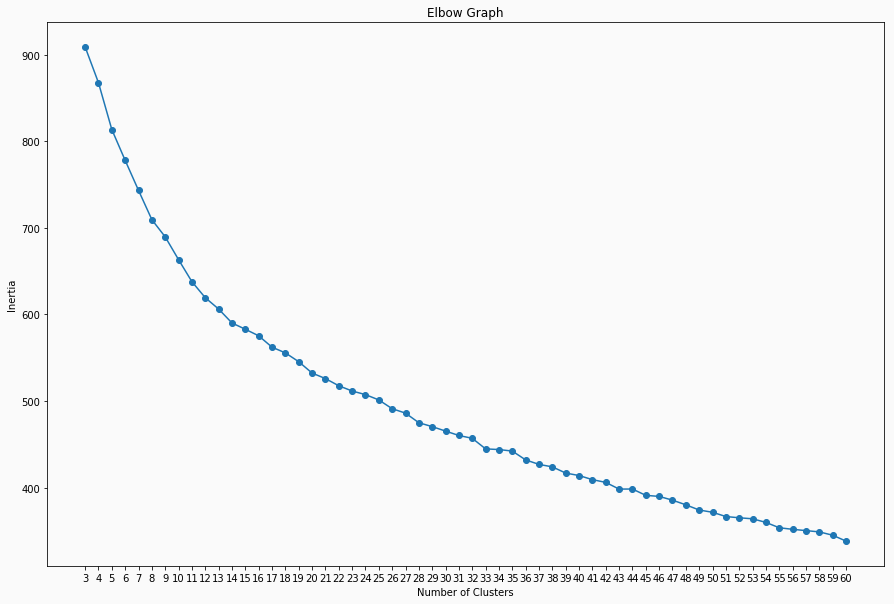

In [34]:
sil = []
inertias=[]
kmax = 60
Range_= range(3, kmax+1)
for k in Range_:
    kmeans = KMeans(init='k-means++',n_clusters = k,n_init=15).fit(matrix)
    labels = kmeans.labels_
    sil.append(silhouette_score(matrix, labels, metric = 'euclidean'))
    
     # Append the inertia to the list of inertias
    inertias.append(kmeans.inertia_)
    
maxpos = sil.index(max(sil))
#Optimal number of clusters
n_clusters_opt = maxpos + 3


# Kmeans model fit and predict
model = KMeans(n_clusters=n_clusters_opt)
model.fit(matrix)
model_clust = model.predict(matrix)
df_clust['labels_kmeans'] = model_clust

inertia_score= model.inertia_

print("Optimal number of clusters:",n_clusters_opt, "with silohuette average of:",(max(sil)))
print("Elbow Score:",inertia_score )
    

    
plt.rcParams['figure.figsize'] = [15, 10]
    
#Silohuette Average Score plot
plt.plot(Range_, sil, '-o')
plt.title('Silohuette Average Graph')
plt.xlabel('Number of clusters');
plt.ylabel('Average Silohuette Score')
plt.xticks(Range_)
plt.show()
    
# Elbow Score Plot
plt.plot(Range_, inertias, '-o')
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters');
plt.ylabel('Inertia')
plt.xticks(Range_)
plt.show()

### Measure feature weight per each cluster and pick up to 80% cummulative weight importance  by each TDIF Vectorized cluster 

In [35]:
from sklearn.preprocessing import normalize
tf_idf_norm = normalize(matrix)
tf_idf_array = tf_idf_norm.toarray()

In [36]:
#Function to get the top features per cluster in TDIF
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    top_features = []
    for label in labels:
        id_temp = np.where(prediction == label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top n_feats scores
        features = vect.get_feature_names()
        best_features = [(label, features[i], x_means[i]) for i in sorted_means]
        top_features.extend(best_features)
    return top_features

In [37]:
#Get 5 top features by TDIF Vectorized cluster weight
top_features_cluster = get_top_features_cluster(tf_idf_array, model_clust, 5)
#Convert to dataframe
df_weight_cluster = pd.DataFrame(top_features_cluster, columns = ['Cluster','Word','Weight'])
#Dataframe example
display(df_weight_cluster.head(5))

Cluster        Word    Weight
0        0          tv  0.712886
1        0  television  0.246739
2        0       video  0.179655
3        0          4k  0.153754
4        0         led  0.143692

In [38]:
#Add Cummulative sum and percentage to highlight weight importance in words per cluster 
df_weight_cluster['cum_sum'] = df_weight_cluster.groupby('Cluster')['Weight'].cumsum()

p_s = []
num_clusters = max(df_weight_cluster['Cluster'])
for i in range(num_clusters + 1):
    cluster_list = df_weight_cluster[df_weight_cluster.Cluster == i]
    for row in cluster_list:
        cum_sum = cluster_list['Weight'].cumsum()
        percentage_sum = 100 * (cum_sum / cluster_list['Weight'].sum())
        cluster_list['test'] = percentage_sum
    p_s.extend(cluster_list['test'])
df_weight_cluster["Percentage_Sum"] = p_s

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [39]:
 df_weight_cluster[:5]

Cluster        Word    Weight   cum_sum  Percentage_Sum
0        0          tv  0.712886  0.712886       49.618777
1        0  television  0.246739  0.959624       66.792447
2        0       video  0.179655  1.139280       79.296949
3        0          4k  0.153754  1.293033       89.998616
4        0         led  0.143692  1.436726      100.000000

In [40]:
#Grab all words per cluster that count with up to 80% in cummulative percentage 
df_weight_cluster = df_weight_cluster[df_weight_cluster['Percentage_Sum'] < 80]

### Vizualization results (80% percentage cummulative weight importance by each TDIF weight cluster)

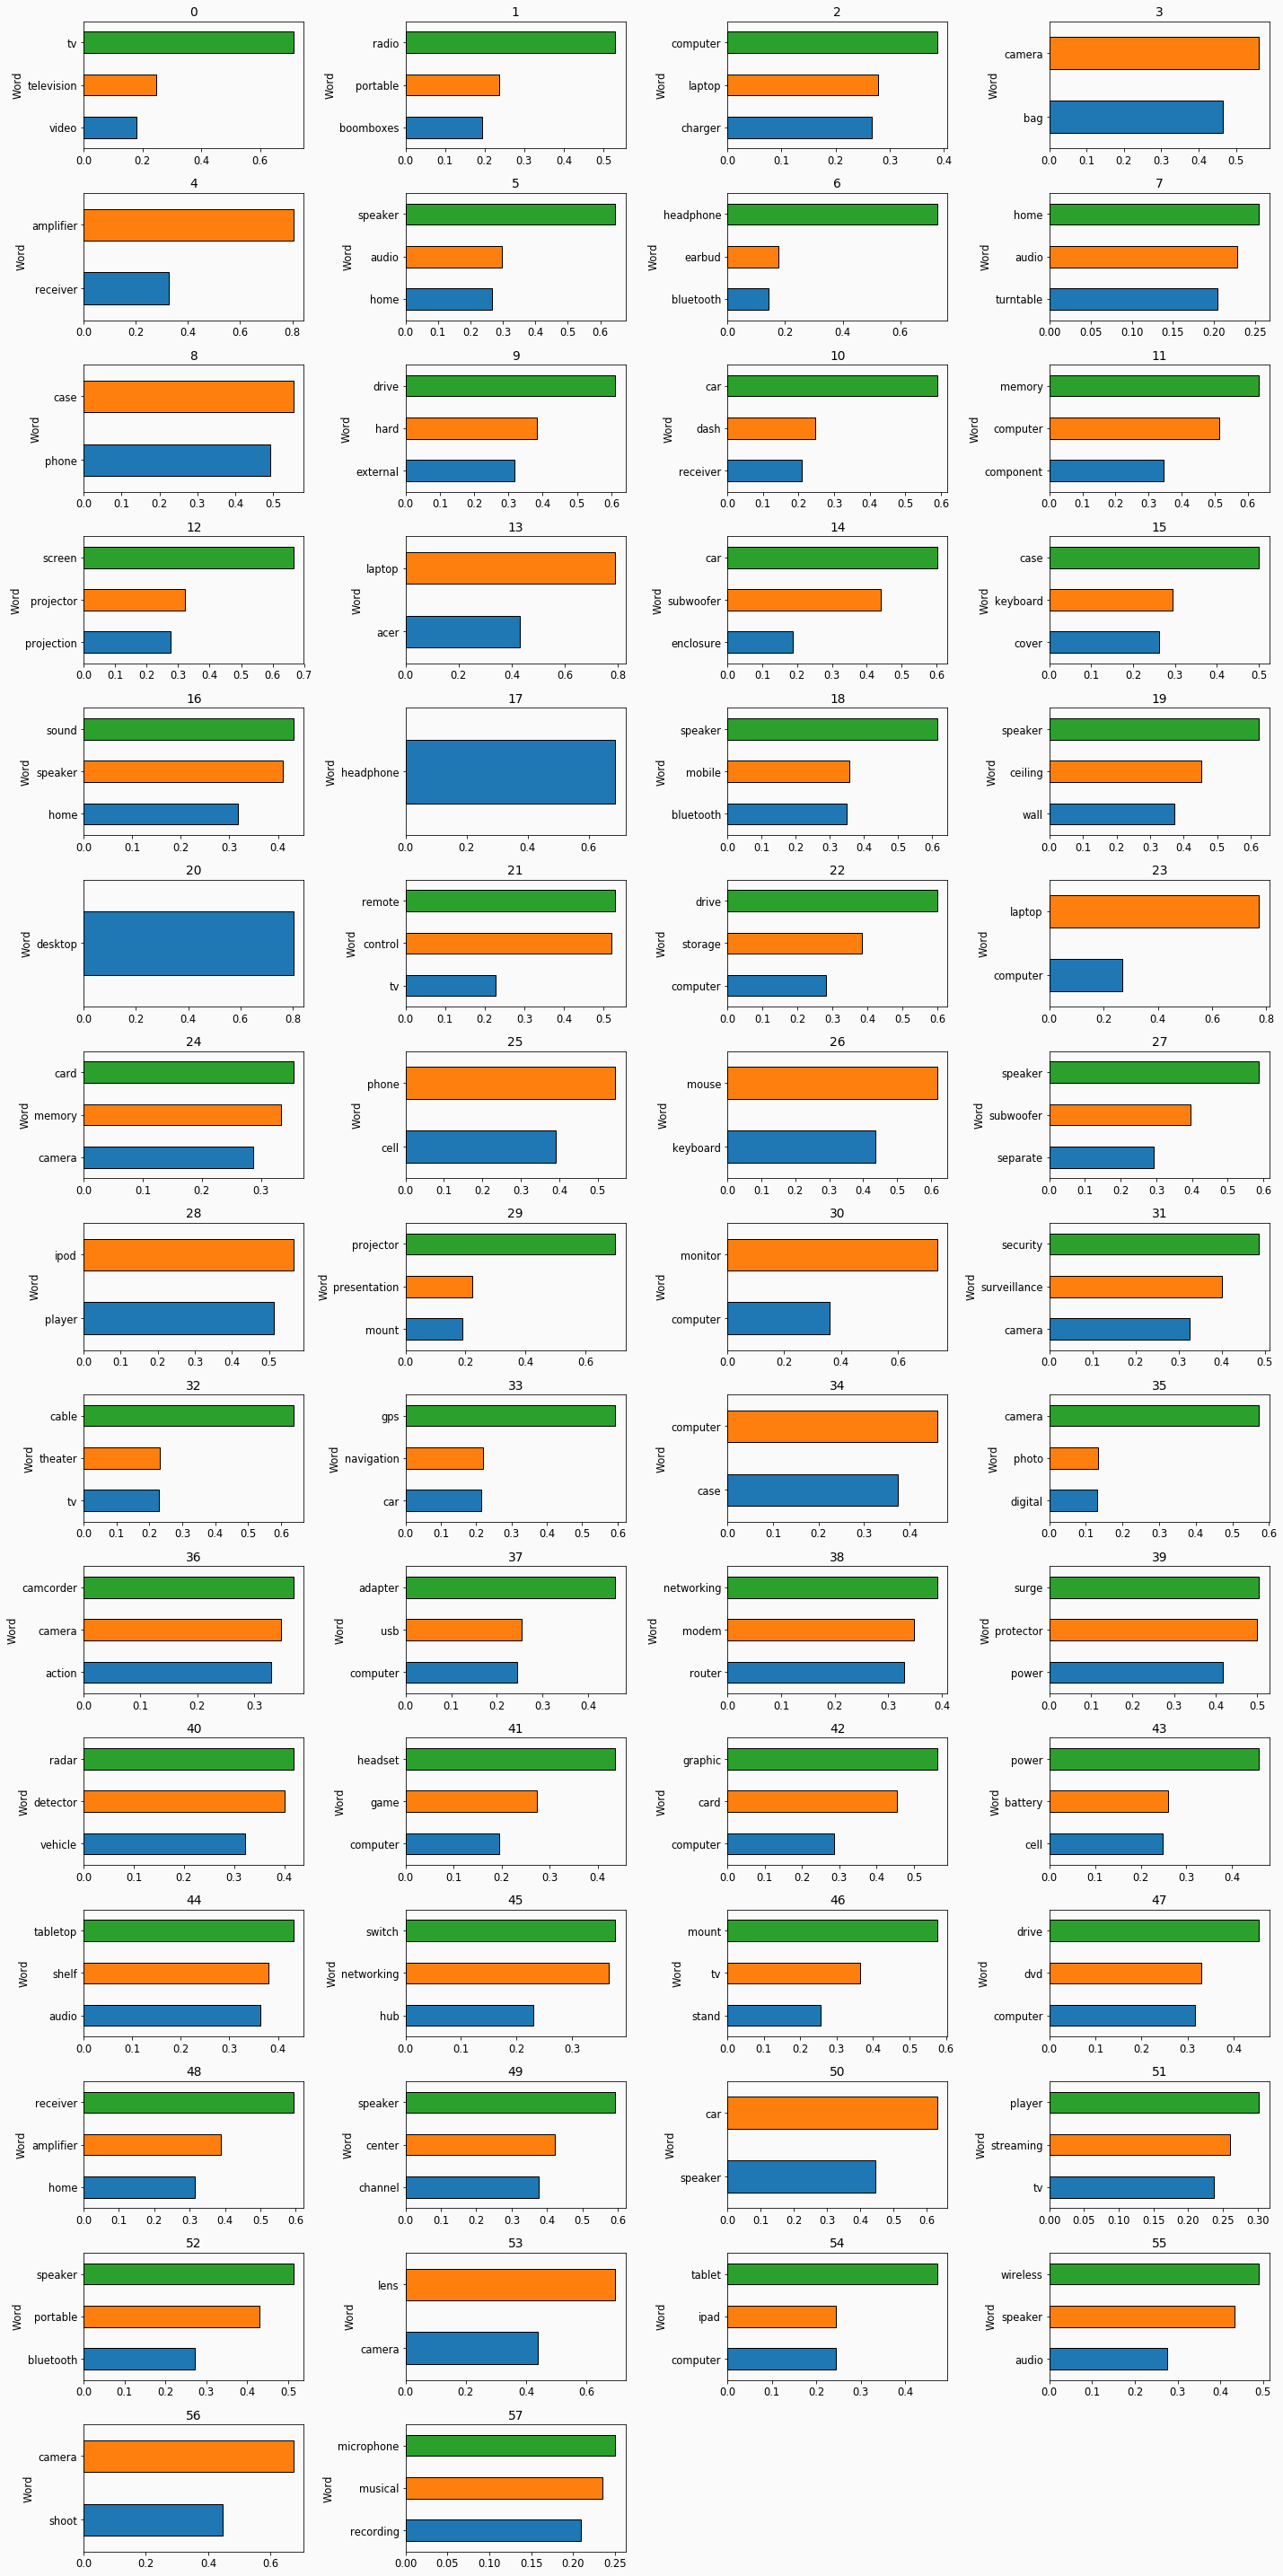

In [41]:
#plt.figure(figsize=(20,40), facecolor='white')
plt.figure(figsize=(20,40))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 11.5}
plt.rc('font', **font)

# plot numbering starts at 1, not 0
plot_number = 1
for cluster_name, selection in df_weight_cluster.groupby('Cluster'):
    # Inside of an image that's a 15x13 grid, put this
    # graph in the in the plot_number slot.
    ax = plt.subplot(15, 4, plot_number)
    selection.sort_values(by='Weight').plot.barh(x='Word', y='Weight', ax=ax, label=cluster_name, legend=False, edgecolor='k')
    ax.set_title(cluster_name)
    # Go to the next plot for the next loop
    plot_number = plot_number + 1
plt.tight_layout()

### Integrate Revelant Words to a Solid category_name label

In [42]:
#Select cluster words for category that adds up to 80% weight in the overall percentage
df_weight_cluster['Category_name'] = df_weight_cluster.groupby('Cluster')['Word'].transform(lambda x: ', '.join(x))
df_category_name = df_weight_cluster[['Cluster','Category_name']].drop_duplicates()
df_category_name[:5]

Cluster               Category_name
0         0       tv, television, video
5         1  radio, portable, boomboxes
10        2   computer, laptop, charger
15        3                 camera, bag
20        4         amplifier, receiver

In [43]:
#Merged cluster results to the original dataframe for exploratory analysis next step phase
df_category = pd.merge(df_category_name[['Cluster','Category_name']],df_clust[['name','p_description','labels_kmeans']],left_on = ['Cluster'],right_on = ['labels_kmeans'], how='inner')

In [44]:
#Adding category name into our main dataset
df_2 = pd.merge(df,df_category[['Cluster','Category_name','name','p_description']], on=['name','p_description'], how='inner')

In [45]:
df_2 = df_2[[ 'Date_imp','Date_imp_d','Cluster','Category_name','name','price','disc_price','merchant','condition','Disc_percentage','isSale','Imp_count', 'brand', 'p_description', 'currency',
       'dateAdded', 'dateSeen', 'dateUpdated', 'imageURLs',
       'manufacturer', 
       'shipping', 'sourceURLs', 'weight', 'Date_imp_d', 'Day_n',
       'year', 'month', 'month_n', 'day', 'Week_Number']]

## New dataframe with category labelled for each product based on their product description

In [46]:
display(df_2.head(5))

Date_imp  Date_imp_d  Cluster                 Category_name  \
0 2017-03-30 06:00:00  2017/03/30       46              mount, tv, stand   
1 2017-03-10 22:00:00  2017/03/10       46              mount, tv, stand   
2 2017-03-04 10:00:00  2017/03/04       46              mount, tv, stand   
3 2017-03-03 14:00:00  2017/03/03       46              mount, tv, stand   
4 2017-12-14 06:00:00  2017/12/14       52  speaker, portable, bluetooth   

                                                name   price  disc_price  \
0  Sanus VLF410B1 10-Inch Super Slim Full-Motion ...  104.99      104.99   
1  Sanus VLF410B1 10-Inch Super Slim Full-Motion ...  104.99      104.99   
2  Sanus VLF410B1 10-Inch Super Slim Full-Motion ...  104.99      104.99   
3  Sanus VLF410B1 10-Inch Super Slim Full-Motion ...  104.99      104.99   
4  Boytone - 2500W 2.1-Ch. Home Theater System - ...   69.00       64.99   

      merchant condition  Disc_percentage isSale  Imp_count    brand  \
0  Bestbuy.com       New             0.00     No          4    Sanus   
1  Bestbuy.com       New             0.00     No          4    Sanus   
2  Bestbuy.com       New             0.00     No          4    Sanus   
3  Bestbuy.com       New             0.00     No          4    Sanus   
4  Walmart.com       New             0.06    Yes          1  Boytone   

                                       p_description currency  \
0  Audio & Video Accessories,TV Mounts,TV Accesso...      USD   
1  Audio & Video Accessories,TV Mounts,TV Accesso...      USD   
2  Audio & Video Accessories,TV Mounts,TV Accesso...      USD   
3  Audio & Video Accessories,TV Mounts,TV Accesso...      USD   
4  Stereos,Portable Bluetooth Speakers,TV, Video ...      USD   

              dateAdded                                           dateSeen  \
0  2015-04-13T12:00:51Z  2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...   
1  2015-04-13T12:00:51Z  2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...   
2  2015-04-13T12:00:51Z  2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...   
3  2015-04-13T12:00:51Z  2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...   
4  2015-05-18T14:14:56Z                               2017-12-14T06:00:00Z   

            dateUpdated                                          imageURLs  \
0  2018-05-12T18:59:48Z  https://images-na.ssl-images-amazon.com/images...   
1  2018-05-12T18:59:48Z  https://images-na.ssl-images-amazon.com/images...   
2  2018-05-12T18:59:48Z  https://images-na.ssl-images-amazon.com/images...   
3  2018-05-12T18:59:48Z  https://images-na.ssl-images-amazon.com/images...   
4  2018-06-13T19:39:02Z  https://images-na.ssl-images-amazon.com/images...   

  manufacturer   shipping                                         sourceURLs  \
0          NaN        NaN  http://www.bestbuy.com/site/sanus-tv-wall-moun...   
1          NaN        NaN  http://www.bestbuy.com/site/sanus-tv-wall-moun...   
2          NaN        NaN  http://www.bestbuy.com/site/sanus-tv-wall-moun...   
3          NaN        NaN  http://www.bestbuy.com/site/sanus-tv-wall-moun...   
4      Boytone  Expedited  https://www.walmart.com/ip/BOYTONE-BT210FB-BLA...   

        weight  Date_imp_d     Day_n  year  month   month_n  day  Week_Number  
0  32.8 pounds  2017/03/30  Thursday  2017      3     March   30           13  
1  32.8 pounds  2017/03/10    Friday  2017      3     March   10           10  
2  32.8 pounds  2017/03/04  Saturday  2017      3     March    4            9  
3  32.8 pounds  2017/03/03    Friday  2017      3     March    3            9  
4    14 pounds  2017/12/14  Thursday  2017     12  December   14           50

# <center>Part 1.2  -. Exploratory Data Analysis  </center>

In [47]:
import pandas as pd
import numpy as np
import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns
import re


#import warnings; warnings.filterwarnings(action='once')
from IPython.display import display, HTML, Image

## Selecting Product Condition for Price Analysis
Below we can notice that the conditions that obtained the most impressions are **New** product conditions. 
Which most popular categories were **camera,lens,digital,photo,photography** and **tv,television,video,4k,led**

**As a result, we would proceed with our data analysis with product condition labelled as new **

In [48]:
#Category impression count dataframe for subplots
Category_count = df_2.groupby(['Category_name','condition'])['Date_imp'].count().reset_index()

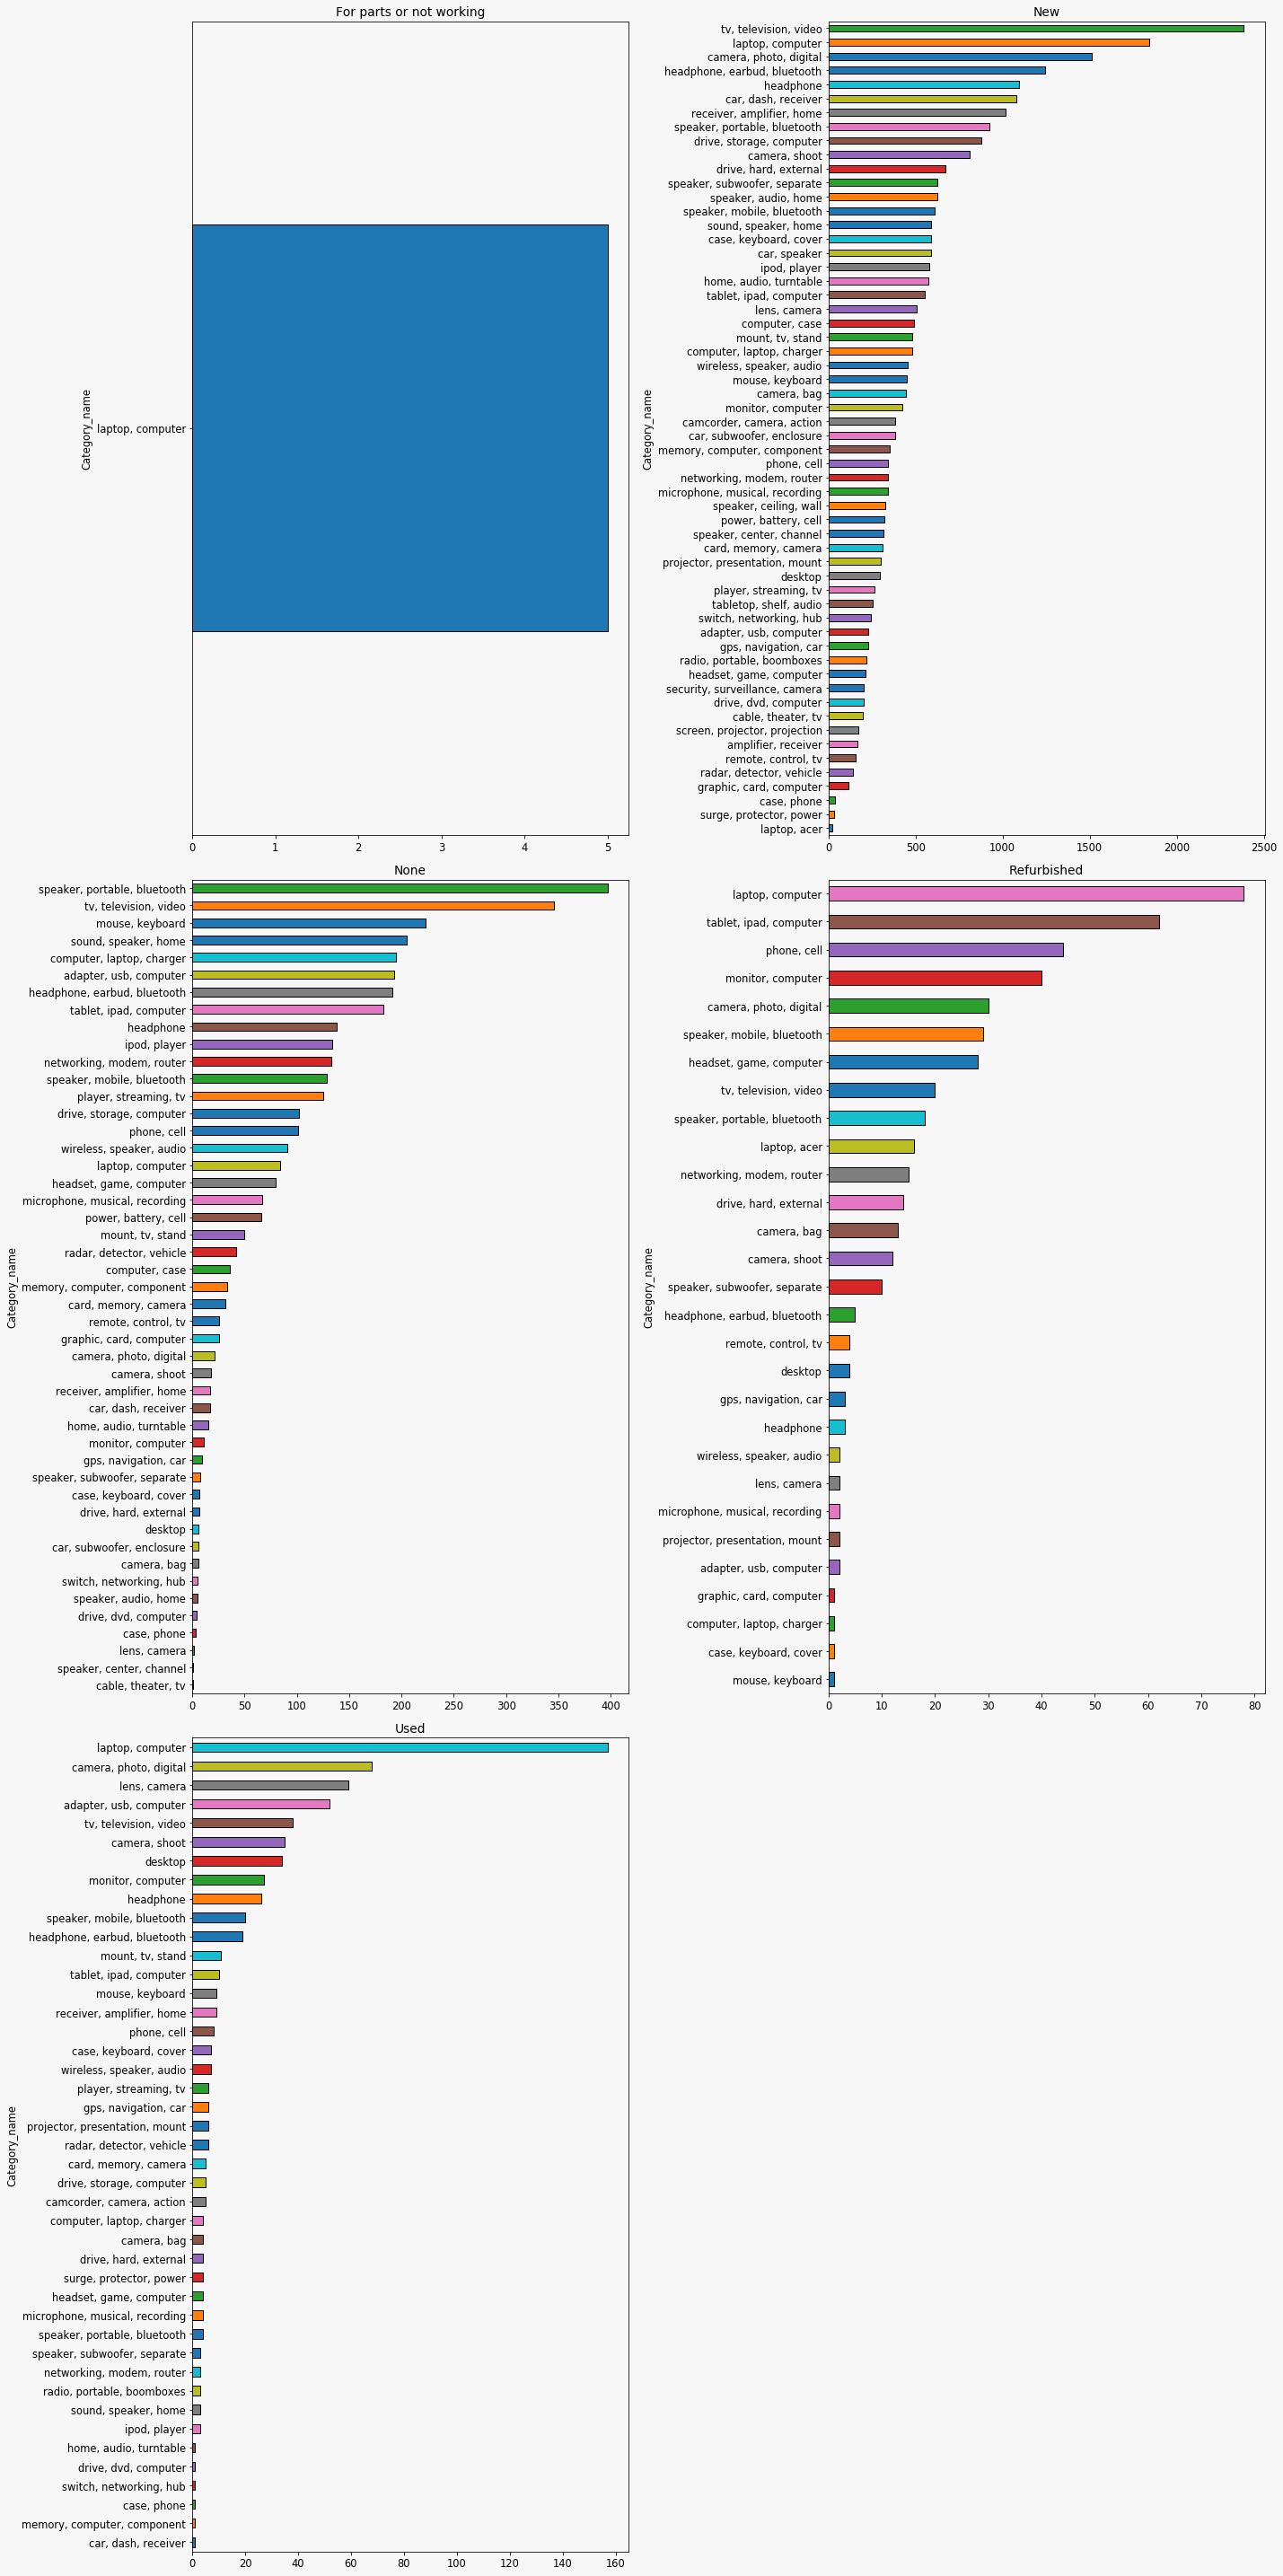

In [49]:
bg_color = (0.97,0.97,0.97)
plt.rcParams['figure.facecolor'] = bg_color
plt.rcParams['axes.facecolor'] = bg_color

#plt.figure(figsize=(20,40), facecolor='white')
plt.figure(figsize=(20,40))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 11.5}
plt.rc('font', **font)

# plot numbering starts at 1, not 0
plot_number = 1
for condition_name, selection in Category_count.groupby('condition'):
    ax = plt.subplot(3,2, plot_number)
    selection.sort_values(by='Date_imp').plot.barh(x='Category_name', y='Date_imp', ax=ax, label=condition_name, legend=False, edgecolor='k')
    ax.set_title(condition_name)
    # Go to the next plot for the next loop
    plot_number = plot_number + 1
plt.tight_layout()

In [50]:
#Dataframe with only new products
df_new = df_2[df_2['condition'] =='New']

# Price Cross- Validation

Therefore, in order to proceed with pricing strategies in machine learning and do not have any currency exchange conflict in our results,this dataset filtered only USD dollar price advertisment.

Following,we can see that about 99% of our data from all products priced were flagged with USD currency:

## Select Only  USD Price Currency

In [51]:
#USD Price Currency
#Analyze type of currency for pricing 
x = df_new['currency'].value_counts()
print("Currency Percentage\n{}\n{}\nCurrency values count\n{}\n{}".format(
      50*"-", x / len(df_new.index) * 100, 50*"-", x))



Currency Percentage
--------------------------------------------------
USD    99.993253
EUR     0.003374
CAD     0.003374
Name: currency, dtype: float64
Currency values count
--------------------------------------------------
USD    29639
EUR        1
CAD        1
Name: currency, dtype: int64


In [52]:
print ('-' * 10 + " New dataframe with only USD Prices " + '-' * 10 )
df_us = df_new[df_new['currency'] == 'USD'] 
df_us['currency'].value_counts()

---------- New dataframe with only USD Prices ----------


USD    29639
Name: currency, dtype: int64

## Detecting Price Outliers by Product Name and  Merchant website

In order to identified any wrong typed information in price, we should analyze all prices per product name and  merchant website. Following, we would detect these wrong typed information by calculating each product name with previous conditions z score and dropped them from our dataset.

**Information about the Z-score**
The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.
The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points.

Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.
In addition, this methodology is the same as standard scaler in machine learning for the standarization of your data.

**You must be wondering that, how does this help in identifying the outliers? **

Well, while calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers.

In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

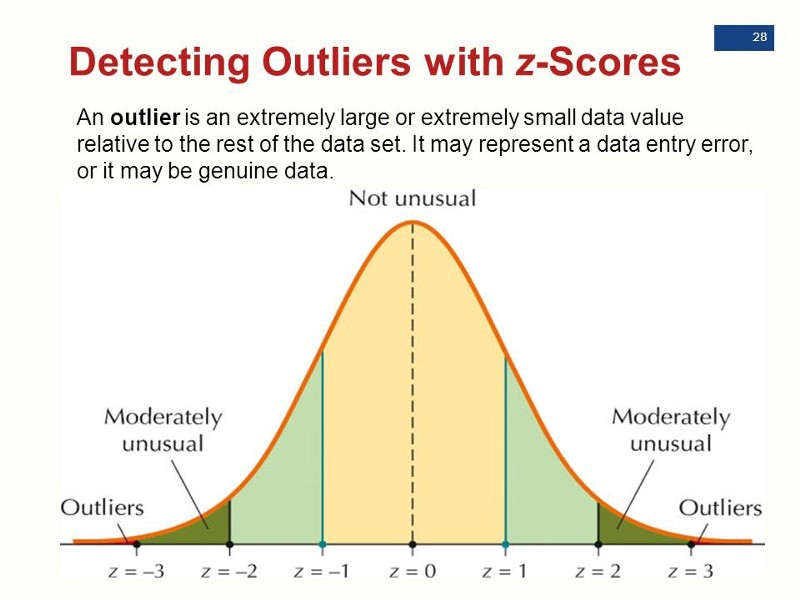

In [53]:
im4 = Image(filename= 'outlierimage.jpeg', width=350, height=350)
display(im4)

In [54]:
#Outlier detection functions

#Zscore function with conditional columns 
def zscore_columns(df, conditional_columns, price_column):
    price = df[price_column]
    Mean = df.groupby(conditional_columns).price.transform('mean')
    Standard = df.groupby(conditional_columns).price.transform('std')
    return ((price - Mean) / Standard)

#Define the Z Score Outlier Threshold by 3 and -3
def anomaly_detect(df, zscore_column):
    zscore = df[zscore_column]
    result = np.where((zscore >= 3), True,
             np.where((zscore <= -3),True,False))
    return result

In [55]:
#Get unique price dataframe by product name, merchant, product condition 
unique_df = df_us[['name','merchant','price']]
unique_df = unique_df.drop_duplicates()


print("Dataframe with unique product name, merchant and price dimensions:", unique_df.shape)
print ('-' * 10 + " Unique_df Dataframe sample " + '-' * 10 )
unique_df[:5]

Dataframe with unique product name, merchant and price dimensions: (8450, 3)
---------- Unique_df Dataframe sample ----------


name     merchant   price
0  Sanus VLF410B1 10-Inch Super Slim Full-Motion ...  Bestbuy.com  104.99
4  Boytone - 2500W 2.1-Ch. Home Theater System - ...  Walmart.com   69.00
6  Boytone - 2500W 2.1-Ch. Home Theater System - ...  Bestbuy.com   69.99
7  Boytone - 2500W 2.1-Ch. Home Theater System - ...  Bestbuy.com   66.99
8  Boytone - 2500W 2.1-Ch. Home Theater System - ...  Walmart.com   66.00

In [56]:
#Calculate Product Price Z Score by merchant and condition (unique_df)
unique_df['Zscore_1'] = zscore_columns(unique_df,['name','merchant'] ,'price')
print ('-' * 10 + " Unique_df Dataframe with Price Z score by Name and Merchant  " + '-' * 10 )

unique_df[:5]


---------- Unique_df Dataframe with Price Z score by Name and Merchant  ----------


name     merchant   price  \
0  Sanus VLF410B1 10-Inch Super Slim Full-Motion ...  Bestbuy.com  104.99   
4  Boytone - 2500W 2.1-Ch. Home Theater System - ...  Walmart.com   69.00   
6  Boytone - 2500W 2.1-Ch. Home Theater System - ...  Bestbuy.com   69.99   
7  Boytone - 2500W 2.1-Ch. Home Theater System - ...  Bestbuy.com   66.99   
8  Boytone - 2500W 2.1-Ch. Home Theater System - ...  Walmart.com   66.00   

   Zscore_1  
0       NaN  
4  0.001525  
6  1.388730  
7  0.000000  
8 -0.760844

In [57]:
# Identified Price Data Anomalies for each product grouped by Merchant(Vendor) and Condition of the product with Zscore
# by giving the threshold of larger than 3 or lower than -3
unique_df['Outlier_mrt_cond'] = anomaly_detect(unique_df, 'Zscore_1')

#Outlier Percentage
outlier_percentage = (len(unique_df[unique_df['Outlier_mrt_cond'] == True])/len(unique_df))
display("Outlier Percentage:"+"{:.2%}".format(outlier_percentage))

#Print example
print('-' * 10 + " Unique_df Dataframe with Price Z score by Merchant and Product Condition " + '-' * 10 )
unique_df[unique_df['Outlier_mrt_cond'] == True]


'Outlier Percentage:0.14%'

---------- Unique_df Dataframe with Price Z score by Merchant and Product Condition ----------


name          merchant  \
4361   Details About Alienware 13 R3 Aw13r3/13.3 Fhd/...       Bestbuy.com   
5887   Details About Alienware 15 R3 Aw15r3/15.6 Fhd/...       Bestbuy.com   
8426   15.4 MacBook Pro with Touch Bar (Late 2016, Sp...       Bestbuy.com   
13893  Apple MacBook - 12 - Core m5 - 8 GB RAM - 512 ...       Bestbuy.com   
14662  LG Electronics OLED65C7P 65-Inch 4K Ultra HD S...          ebay.com   
15063  Apple MacBook Pro with Touch Bar - 13.3 - Core...       Bestbuy.com   
19133                           GoPro HERO6 Black Camera  bhphotovideo.com   
19507                            Wireless HD Digital Kit       Walmart.com   
21048  15.4 MacBook Pro with Touch Bar (Late 2016, Si...       Bestbuy.com   
24572  D750 DSLR Camera Body with Adobe Creative Clou...          ebay.com   
25958  Details About Apple Macbook Air 13.3 Laptop (e...          ebay.com   
31359  instax mini 8 Instant Film Camera and Groovy C...          ebay.com   

         price  Zscore_1  Outlier_mrt_cond  
4361      1.00 -3.086848              True  
5887      1.00 -3.111555              True  
8426      2.00 -3.981794              True  
13893     1.00 -3.198528              True  
14662  3799.99  3.468211              True  
15063     1.00 -3.848929              True  
19133  1199.00  3.004671              True  
19507   506.61  3.840516              True  
21048     2.00 -3.062857              True  
24572  2269.83  3.710774              True  
25958  1199.99  3.242785              True  
31359   149.90  3.465613              True

Previously we can analyzed that we count with **0.14% of price anomalies** by merchant and product condition. Therefore, we proceed and drop these outliers for further analysis

In [58]:
#Merged outlier detection according to zscore and price zscore per each product impression
df_us = pd.merge(df_us, unique_df,on = ['name','merchant','price'], how='inner')

In [59]:
#Outlier Percentage
print("Impression Outlier Count Identified: ", len(df_us[df_us['Outlier_mrt_cond'] == True]),"out of ", len(df_us))

#Clean outliers from dataframe sample
df_c = df_us[df_us['Outlier_mrt_cond'] == False]
print("Clean Dataframe Dimmensions: ", df_c.shape)

Impression Outlier Count Identified:  45 out of  29639
Clean Dataframe Dimmensions:  (29594, 32)


## Drop Entire Product Prices without Price Variation (std = 0)

Due that our dependent variable is impression count and our future features for cross price elasticity analysis depend on the interrelation between impression and price variation. We excluded prices without variation in our sample data

For further analysis on price, we will used the main variables in `disc_price` due that this feature is the current price in a given impression date

Briefly, we count with 1300 products out of 3388 price sample per product condition and merchant that report a standard deviation of 0.
As a result these product name per merchant and product condition are dropped for further analysis

In [60]:
price_std = df_c.groupby(['merchant','name'])['disc_price'].std()
price_std = price_std.fillna(0).reset_index()
price_std = price_std.rename(columns={"disc_price": "price_std"})


threshold = .0
price_std['Variation'] = np.where((price_std['price_std'] > threshold), True,False)

#Print number of prices without variability std deviation 
print("Price per product condition and merchant with a standard deviation of 0: ",len(price_std[price_std['Variation'] ==False]),"out of ", len(price_std))

Price per product condition and merchant with a standard deviation of 0:  1031 out of  2876


In [61]:
print ('-' * 10 + " Dataframe that Contains Prices with 0 Standard Deviation " + '-' * 10 )
price_std[price_std['Variation'] ==False][:5]


---------- Dataframe that Contains Prices with 0 Standard Deviation ----------


merchant                                               name  price_std  \
3   Bestbuy.com                      10TB G-DRIVE with Thunderbolt        0.0   
17  Bestbuy.com      151 SE Outdoor Environmental Speakers (White)        0.0   
18  Bestbuy.com                   17.3 WE72 7RJ Mobile Workstation        0.0   
19  Bestbuy.com     1TB G-Drive Mobile Hard Drive with Thunderbolt        0.0   
26  Bestbuy.com  24-70mm f/2.8 GM Lens and 82mm Circular Polari...        0.0   

    Variation  
3       False  
17      False  
18      False  
19      False  
26      False

In [62]:
#Merged variation detection according to standard deviation
df_c = pd.merge(df_c , price_std, on =['merchant','name']) 

index  Variation
0   True      23151
1  False       6443

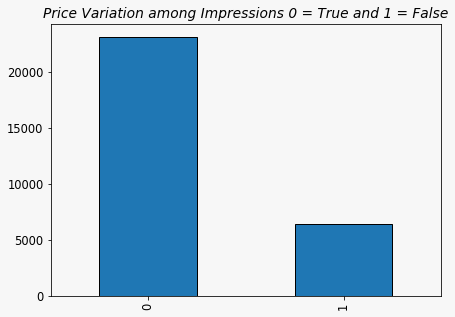

In [63]:
#Standard Deviation plot sample 
std_plot = df_c['Variation'].value_counts().reset_index()
display(std_plot)

plt.rcParams['figure.figsize'] = [7, 5]
std_plot.plot.bar( legend = False, width=.5, align= 'center', edgecolor ='k')
plt.title('Price Variation among Impressions 0 = True and 1 = False',color='Black', fontstyle='italic')
plt.show()

In [64]:
#Filter only the impressions with price variation for further analysis
df_clean = df_c[df_c['Variation'] ==True]

In [65]:
#Print Deleted Impressions with price variability
print("Sustainable Impressions for further price regression analysis model: ", len(df_clean))
print("Percentage Deleted: "+"{:.2%}".format(1 - len(df_clean)/ len(df_c)))

Sustainable Impressions for further price regression analysis model:  23151
Percentage Deleted: 21.77%


In [66]:
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

In [67]:
#Price Descriptive Analysis by Product Condition and Cluster Category
price_descriptive = df_clean.groupby(['Category_name'])['disc_price'].describe()

In [68]:
#Price Descritive Analysis by Product Condition and k_meanscluster (Category)
print ('-' * 10 + " Price Descriptive Analysis by Cluster and Product Condition " + '-' * 10 )
price_descriptive.head(100)

---------- Price Descriptive Analysis by Cluster and Product Condition ----------


count         mean          std     min  \
Category_name                                                              
adapter, usb, computer           170.0    39.937412    17.476004   12.54   
cable, theater, tv                32.0    68.646250    12.057950   32.99   
camcorder, camera, action        252.0   354.974524   186.734378    6.99   
camera, bag                      264.0    78.260985    80.627101   14.99   
camera, photo, digital          1372.0   911.424643  1071.827048    2.00   
camera, shoot                    744.0   569.181062   272.225647   50.00   
car, dash, receiver              970.0   227.955474   356.279505   16.99   
car, speaker                     516.0    84.282946    37.678763   20.95   
car, subwoofer, enclosure        297.0   137.861919    61.955556   48.39   
card, memory, camera             267.0    93.612959    58.801666   12.99   
case, keyboard, cover            500.0    72.140500    40.339392   18.00   
case, phone                       26.0    61.135000    20.644963   33.05   
computer, case                   405.0   100.628914    54.191172   12.75   
computer, laptop, charger        313.0   111.599904   104.894694   17.99   
desktop                          257.0  1307.588599   495.851003  599.00   
drive, dvd, computer             167.0   117.698802   126.563707   24.99   
drive, hard, external            506.0   145.192372    83.359217   45.99   
drive, storage, computer         764.0   251.940955   250.206192   39.99   
gps, navigation, car             168.0   104.103571    95.586450    6.99   
graphic, card, computer          100.0   348.992400   202.279614  149.99   
headphone                        599.0   266.535643   274.717247   29.00   
headphone, earbud, bluetooth     854.0   153.435281   114.754907   14.99   
headset, game, computer          186.0   108.725269    87.560296   31.99   
home, audio, turntable           399.0   158.461905   103.731818   14.04   
ipod, player                     537.0   196.243743   132.095415   29.92   
laptop, acer                      15.0   827.635333    68.397269  703.49   
laptop, computer                1700.0  1210.150894   775.802496    1.00   
lens, camera                     344.0  1594.945349  2999.127804   27.48   
memory, computer, component      285.0   161.115404    81.434792   45.10   
microphone, musical, recording   227.0   305.500044   402.141515   43.99   
monitor, computer                336.0   333.771458   217.682836   63.89   
mount, tv, stand                 190.0    81.157263    34.770102   28.99   
mouse, keyboard                  399.0    81.499474    38.608153   19.17   
networking, modem, router        288.0   227.290278   130.912524   45.61   
phone, cell                      275.0   101.683564   136.850485    1.00   
player, streaming, tv            222.0   197.057432    92.863545   39.99   
power, battery, cell             207.0    49.443816    43.977671    6.45   
projector, presentation, mount   204.0   688.148137   790.916079    1.50   
radar, detector, vehicle         121.0   359.574876   188.114451   10.19   
radio, portable, boomboxes       181.0    67.766851    22.887739   26.99   
receiver, amplifier, home        817.0   520.378397   363.754348   72.29   
remote, control, tv              110.0   165.393636   112.783904   19.99   
screen, projector, projection    129.0   329.016977   298.359813   70.12   
security, surveillance, camera   152.0   157.745000   121.968730    8.50   
sound, speaker, home             465.0   451.787505   304.848697   58.49   
speaker, audio, home             449.0   165.261604   114.443585   13.01   
speaker, ceiling, wall           105.0   167.517429    46.247704   99.99   
speaker, center, channel         210.0   267.118095   155.155715   66.81   
speaker, mobile, bluetooth       487.0   132.415975    69.247247   19.00   
speaker, portable, bluetooth     735.0   108.561320    77.130874   19.99   
speaker, subwoofer, separate     355.0   305.028310   181.017778   98.00   
surge

# Price Distribution per Category

- Histogram Price Distribution per Category (check)
- Violin ""
- Boxplot Price Distribution per Category
- Heatmap Discount Impression Count per Category and Discount Percentage (check)

[Text(0.5,1,'Price Distribution per Category ')]

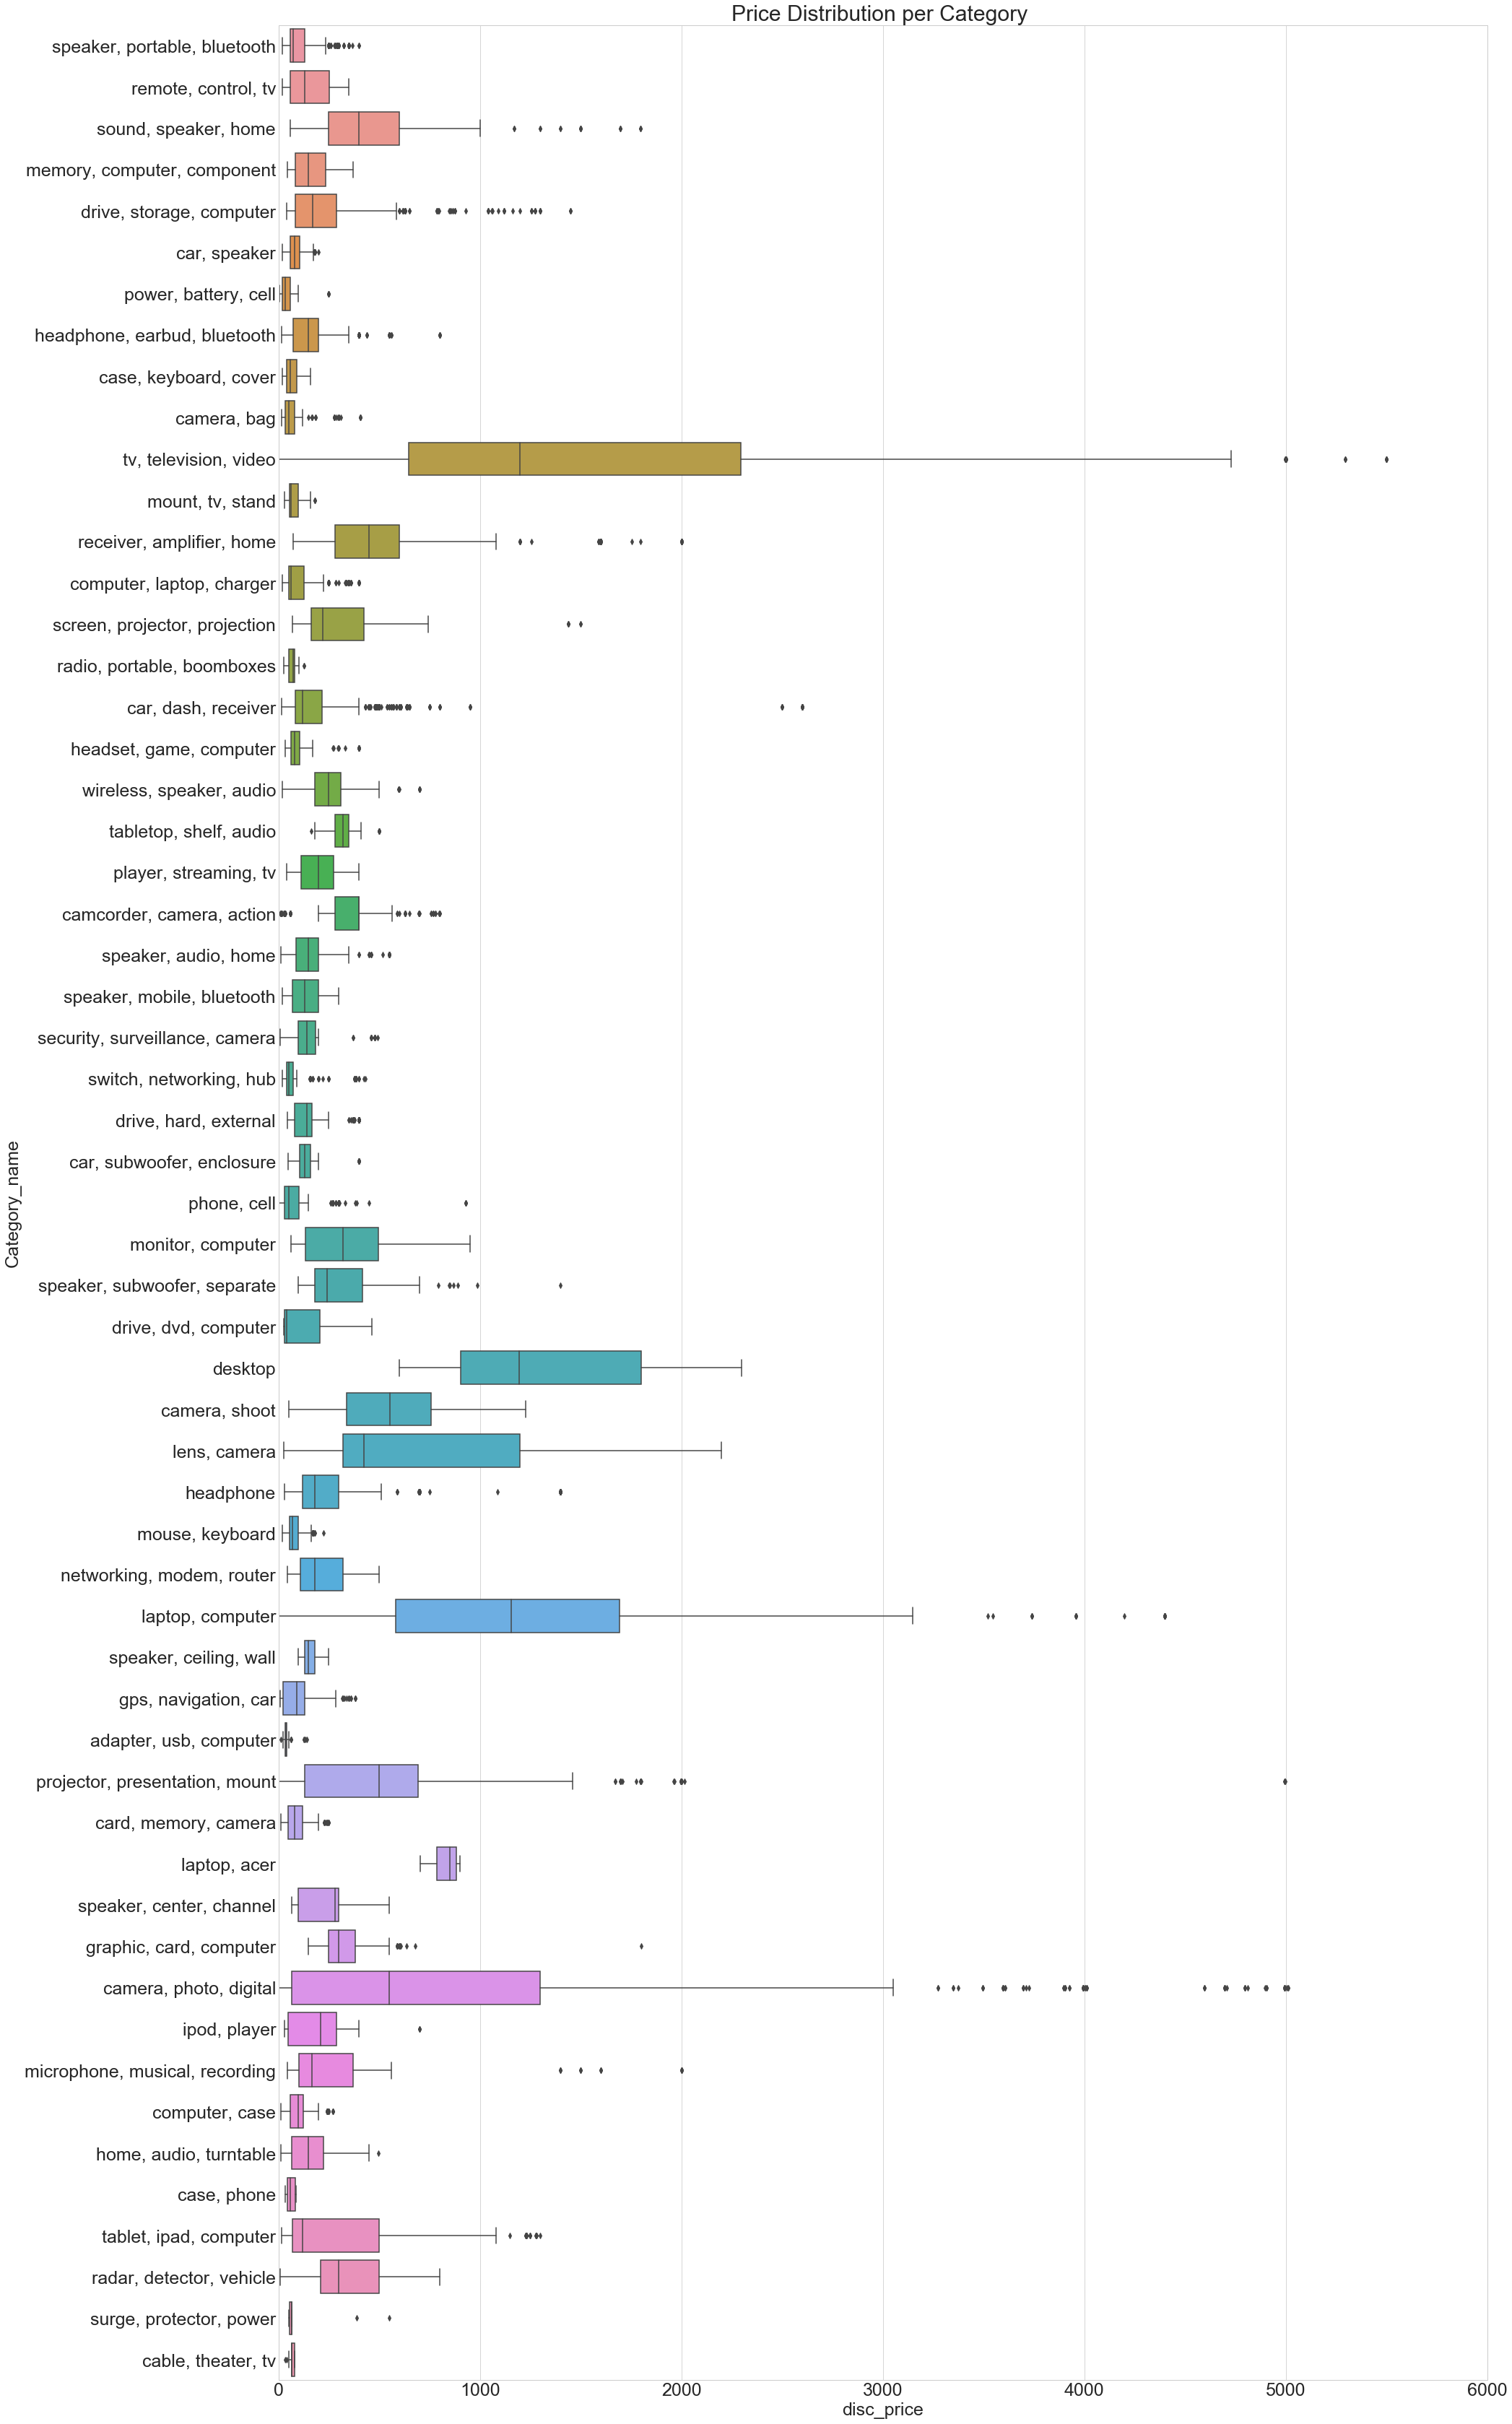

In [69]:
#Price Boxplot per Category
plt.rcParams['figure.figsize'] = [30, 60]
plt.rcParams['font.size'] = 25
sns.set_style("whitegrid")
ax1 = sns.boxplot( x = df_clean['disc_price'] , y = df_clean['Category_name'], orient = "h")
ax1.set(xlim = (0, 6000))
ax1.set(title = "Price Distribution per Category ")


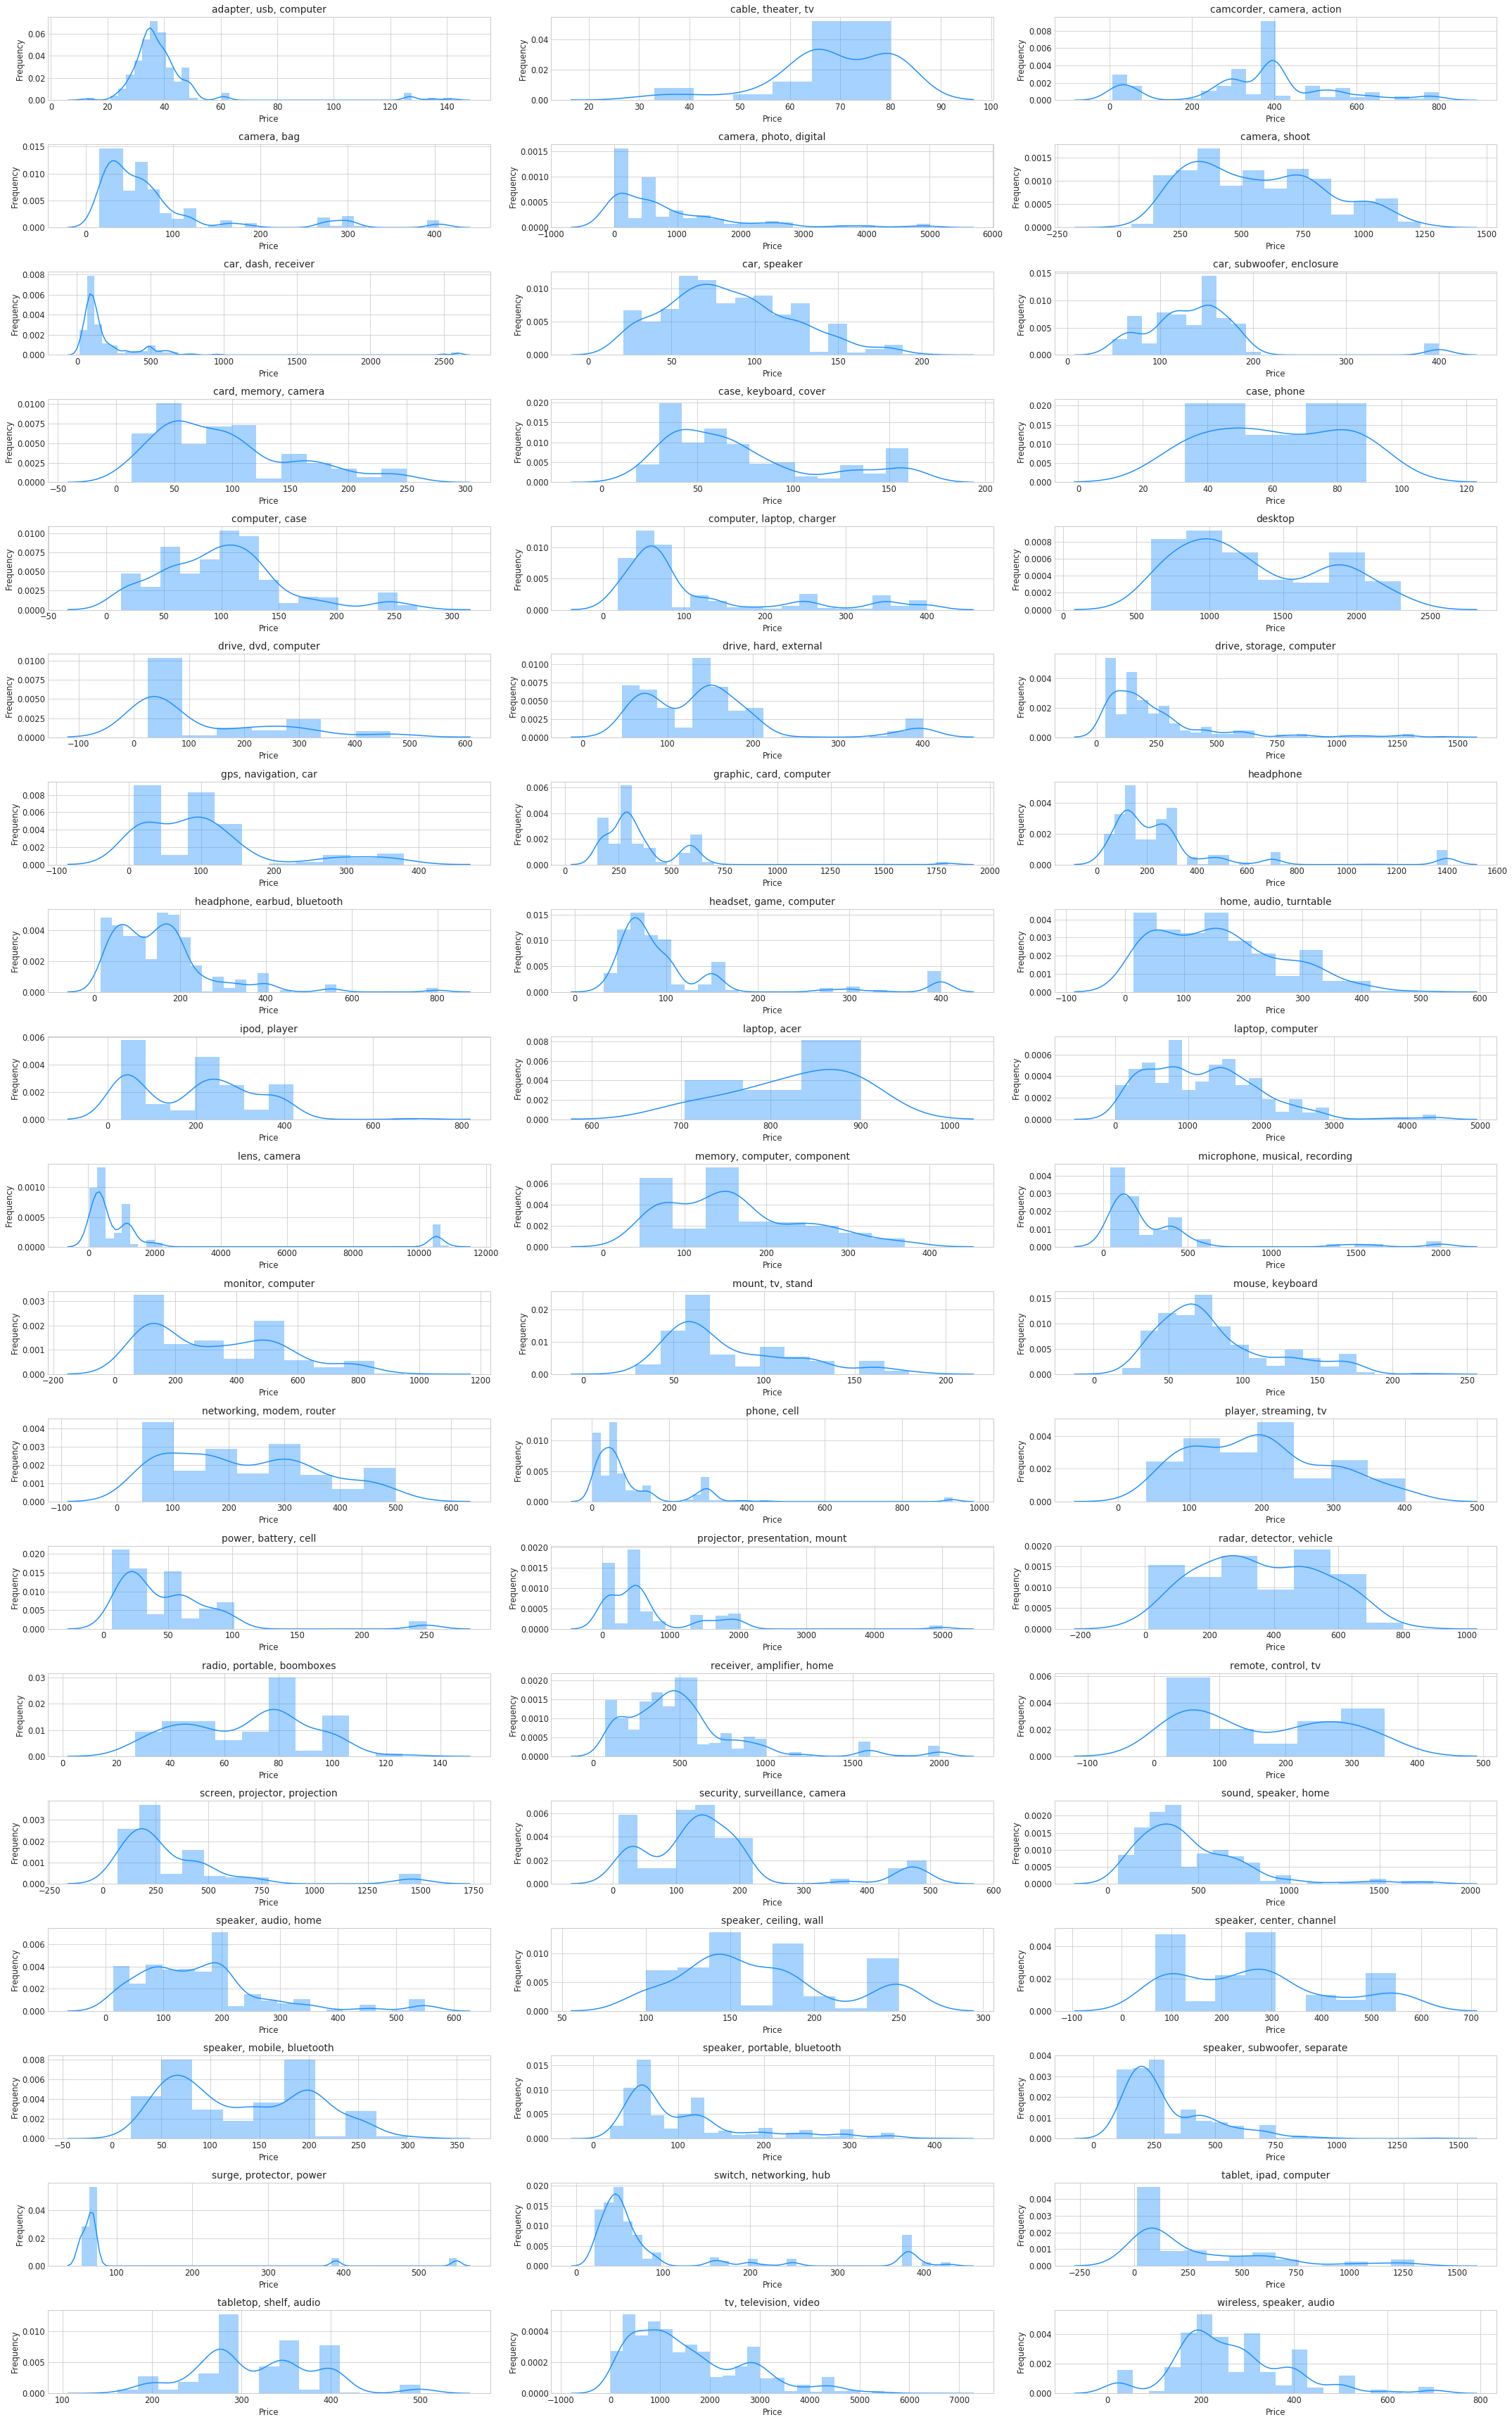

In [70]:
# Price Distribution Plot per Category
plt.figure(figsize=(30,50))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 11.5}
plt.rc('font', **font)


# Price Distribution Plot per Category
plot_number = 1
for category_name, selection in df_clean.groupby('Category_name'):
    ax = plt.subplot(20,3, plot_number)
    sns.distplot( df_clean.loc[df_clean.Category_name == category_name, "disc_price"] , color="dodgerblue")
    ax.set(title = category_name, xlabel = 'Price',ylabel = 'Frequency')

    # Go to the next plot for the next loop
    plot_number = plot_number + 1
plt.tight_layout()



In [71]:
#Enclosed only Sale prices for Discount Range Heatmap
disc_df =  df_clean[df_clean['isSale'] =='Yes']

In [72]:
#Discount Bracket function
def percentage_clust(df, disc_column):
    disc = df[disc_column]
   
    result = np.where(( disc <= .099), 'Less than 10%',
             np.where(((disc >= .10) & (disc <= .30)), '10% - 30%',
             np.where(((disc >= .31) & (disc <= .50)), '31% - 50%',
             np.where(((disc >= .51) & (disc <= .70)), '51% - 70%',
             np.where((disc >= .71), 'More than 70%', 'Other')))))
    return result

In [73]:
#Labelled each Disc_percentage into a discount bracket
disc_df['Percentage_bracket'] = percentage_clust(disc_df, 'Disc_percentage')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [74]:
#Create Dataframe for heatmap
heat_mapdisc = disc_df.groupby(['Category_name','Percentage_bracket'])['Disc_percentage'].count().reset_index()
heat_mapdisc = heat_mapdisc.rename(columns = {"Disc_percentage": "Count"})

In [75]:
# Heatmap DataFrame   
heat_mapdisc['Total_Count'] = heat_mapdisc['Count'].groupby(heat_mapdisc['Category_name']).transform('sum')
#Percentage from Total Count
heat_mapdisc['Percentage_Totalcount'] = round((heat_mapdisc['Count'] / heat_mapdisc['Total_Count']),2)
#Heatmap with at least 30 Impression Count
heat_mapdisc = heat_mapdisc[heat_mapdisc['Total_Count'] > 30]


#Create pivot table for sns heatmap and re-order the columns
pivot_heatmapdisc = heat_mapdisc.pivot(index = 'Category_name', columns = 'Percentage_bracket', values = 'Percentage_Totalcount')

#Reorder columns
column_order = ['Less than 10%', '10% - 30%', '31% - 50%','More than 70%']
pivot_heatmapdisc = pivot_heatmapdisc.reindex(column_order, axis=1)

Text(0.5,1,'Impressions Distribution Count for Discount Range per Category ')

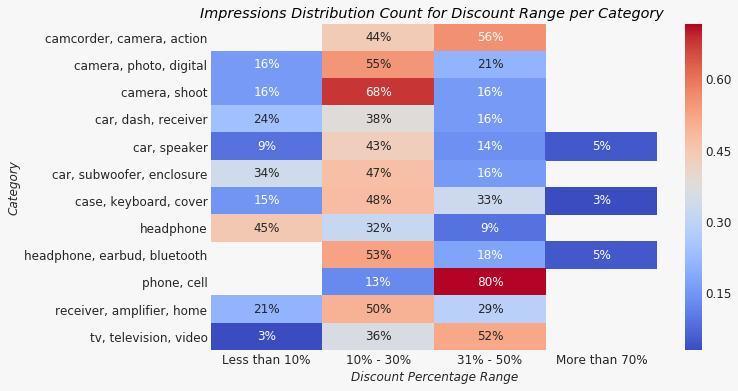

In [76]:
#Heatmap plot of the Impressions Distribution Count for Discount Range per Category
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12
bg_color = (0.97,0.97,0.97)
plt.rcParams['figure.facecolor'] = bg_color
plt.rcParams['axes.facecolor'] = bg_color
fmt = lambda x,pos: '{:.00%}'.format(x)
fig, ax = plt.subplots(1)
heatmap_pivot = sns.heatmap(pivot_heatmapdisc , cmap='coolwarm',robust=True,annot=True,annot_kws={'size':12},fmt='.00%')
plt.xlabel('Discount Percentage Range',fontstyle='italic')
plt.ylabel('Category',fontstyle='italic')
plt.title("Impressions Distribution Count for Discount Range per Category ",color='Black', fontstyle='italic')

## Merchant Impression Percentage Share Distribution

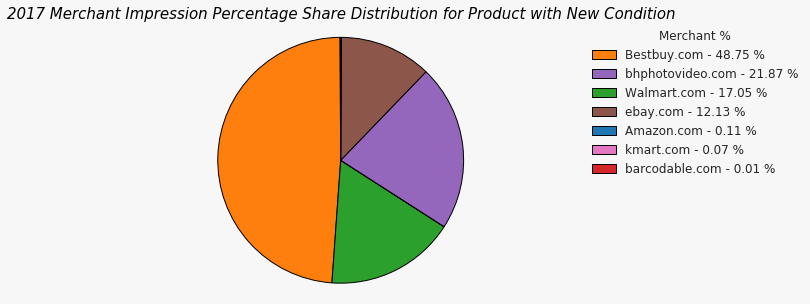

In [77]:

#Pie Chart Dataframe    
pie_web = df_clean.groupby('merchant').agg({'Date_imp':'count'}).reset_index()
pie_web = pie_web.rename(columns = {'merchant':'Merchant','Date_imp':'Impressions'})

x = pie_web['Merchant']
Imp_count = pie_web['Impressions']
percent_imp = 100.*Imp_count/Imp_count.sum()

#Pie Chart Plot
plt.rcParams['figure.figsize'] = [8, 5]
patches, texts = plt.pie(Imp_count  ,startangle = 90, shadow = False, wedgeprops = {"edgecolor":"k",'linewidth': 1, 'antialiased': True})
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent_imp)]
sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, Imp_count),
                                          key=lambda x: x[2],
                                          reverse=True))
plt.legend(patches, labels, title = 'Merchant %', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,
           fontsize = 12)
    
plt.title('2017 Merchant Impression Percentage Share Distribution for Product with New Condition',fontsize = 15,color='Black', fontstyle='italic' )
plt.axis('equal')
plt.show()

## 2017 Impression Time Analysis by Weekly and Monthly Basis

Dataframe dimensions with impressions: (23151, 34)


Products  Merchants  Impressions
2017 Quantity       908          7        23151

None


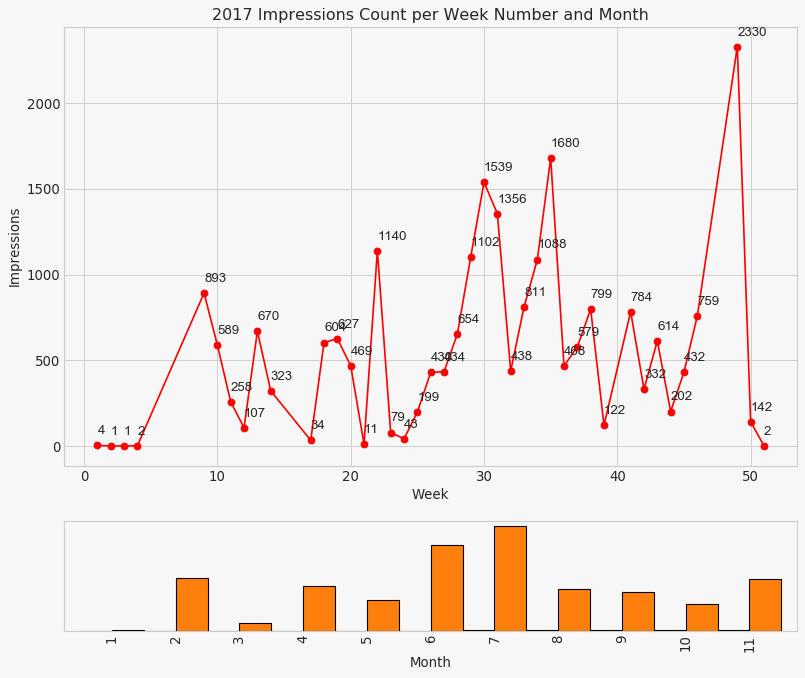

In [78]:
print("Dataframe dimensions with impressions:" ,df_clean.shape)

summary = pd.DataFrame([{'Merchants': len(df_clean['merchant'].unique()),    
               'Impressions': len(df_clean['year']),
               'Products': len(df_clean['name'].unique()),  
              }], columns = [ 'Products','Merchants','Impressions'], 
              index = ['2017 Quantity'])

print(display(summary))

# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

sns.set_style("whitegrid")

#Linearplot for impressions per week during 2017
l_plot = df_clean.groupby('Week_Number')['Date_imp'].count().reset_index()
bar_subplot = df_clean.groupby('month')['Date_imp'].count().reset_index()
month_ = bar_subplot['month']
week = l_plot['Week_Number']
count_imp = l_plot['Date_imp']
count_impmon = bar_subplot['Date_imp']

#
ax_main.plot(week ,count_imp,color='red', marker='o')
ax_main.set(title='2017 Impressions Count per Week Number and Month', xlabel='Week', ylabel='Impressions')
for x,y in zip(week,count_imp):

    label = "{:.0f}".format(y)

    ax_main.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='left') # horizontal alignment can be left, right or center


bar_subplot.plot.bar(ax=ax_bottom, legend = False, width=1, align= 'center',edgecolor='k')
ax_bottom.set(xlabel='Month')
ax_bottom.set_xticklabels(np.arange(min(month_), max(month_)+1))
ax_bottom.grid(False)
plt.show()

## Impressions Amount Issued Across the Year By Merchant

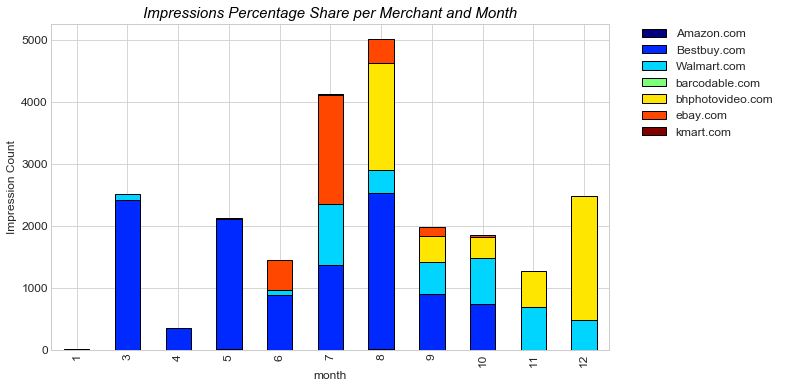

In [79]:
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())


#Base dataframe for stacked plot and Spaguetti plot
plt.rcParams['figure.figsize'] = [10, 6]
b_imp = df_clean.groupby(['month','merchant'])['name'].count()
b_imp = pd.DataFrame(b_imp)
b_imp = b_imp.reset_index()


#Data Preprocessing for Stacked plot by impressions count and Spaguetti plot
cmp = plt.cm.get_cmap('jet')
pivot_spaguetti = b_imp.pivot(index='month', columns='merchant', values='name')
pivot_spaguetti.plot.bar(stacked=True,cmap=cmp, edgecolor='k')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Impressions Percentage Share per Merchant and Month",fontsize = 15,color='Black', fontstyle='italic')
plt.ylabel("Impression Count")
plt.show()

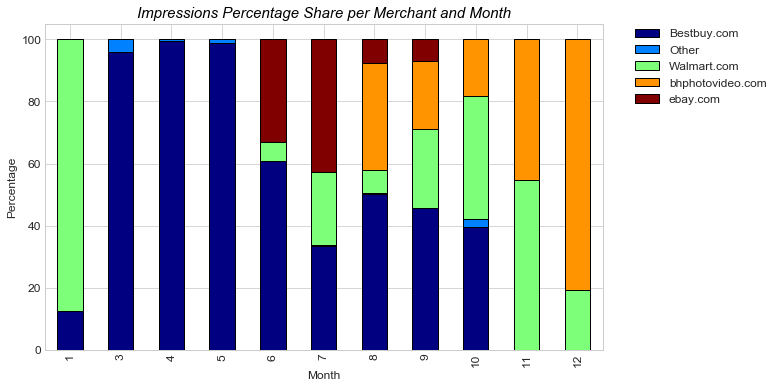

In [80]:
#Total Impressions per month
b_imp['Impressions_month'] = b_imp['name'].groupby(b_imp['month']).transform('sum')
#Impressions Percentage Share by year and vendor
b_imp['Percentage_share'] = round(((b_imp['name'])/(b_imp['Impressions_month']))*100,2)


#Data processing for Stacked plot (Classify as Other to the Merchant that has less than %5 impressions percentage share per year)
b_imp['Vendor_5p'] = np.where(b_imp.Percentage_share < 5, 'Other', b_imp['merchant'])
stck_plot_5 = b_imp.groupby(['month','Vendor_5p'])['Percentage_share'].sum()
stck_plot_5 = pd.DataFrame(stck_plot_5).reset_index()
stck_plot_5 = stck_plot_5.rename(columns={'month': 'Month', 'Vendor_5p': 'Merchant',})
pivot_df_5 =stck_plot_5
#Convert to pivot table 
pivot_df_5 = pivot_df_5.pivot(index='Month', columns='Merchant', values='Percentage_share')

#Stacked barplot of number of impressions per month by website
fig=plt.figure(figsize=(40,32))

cmp = plt.cm.get_cmap('jet')
pivot_df_5.plot.bar(stacked=True, cmap=cmp,  edgecolor='k')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Impressions Percentage Share per Merchant and Month",fontsize = 15,color='Black', fontstyle='italic')
plt.ylabel("Percentage")
plt.show()



# Price Dataframe Correlogram 

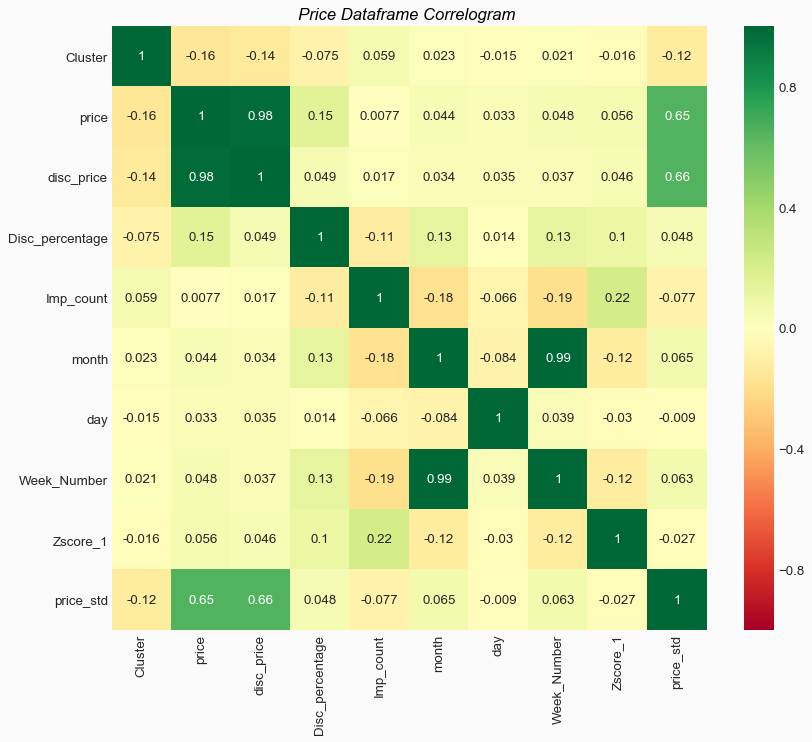

In [81]:
#Setting background color for all graphs
bg_color = (0.98,0.98,0.98)
plt.rcParams['figure.facecolor'] = bg_color
plt.rcParams['axes.facecolor'] = bg_color

#Drop Columns with same values
df_clean = df_clean.drop(columns=['year', 'Outlier_mrt_cond','Variation'])
#Correlogram Plot
plt.figure(figsize=(12,10), dpi= 80)
column_corr = sns.heatmap(df_clean.corr(), xticklabels=df_clean.corr().columns, yticklabels=df_clean.corr().columns, cmap ='RdYlGn',robust = True,annot = True, annot_kws = {'size':12}, vmin = -1)

# Adjustments
plt.title('Price Dataframe Correlogram ', fontsize = 15,color='Black', fontstyle='italic')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Cross-price elasticity 


In [82]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from scipy.stats import skew, norm, kurtosis, zscore

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


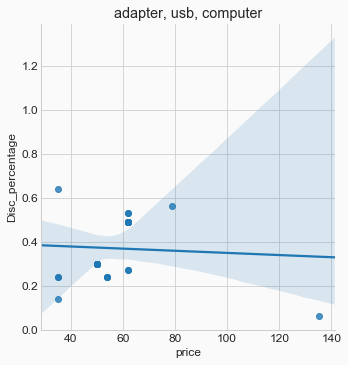

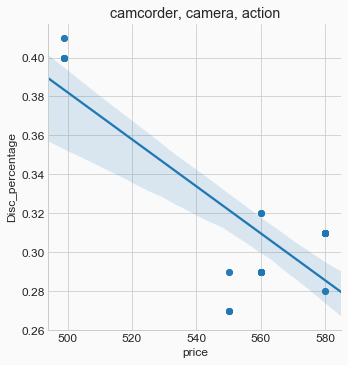

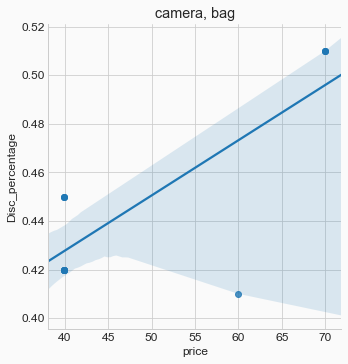

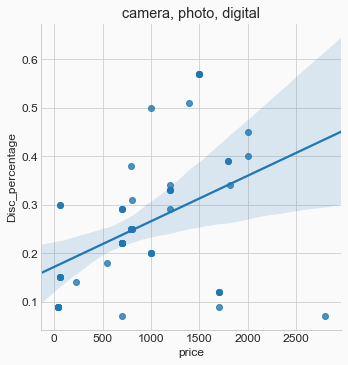

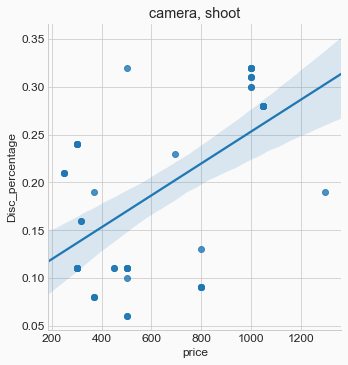

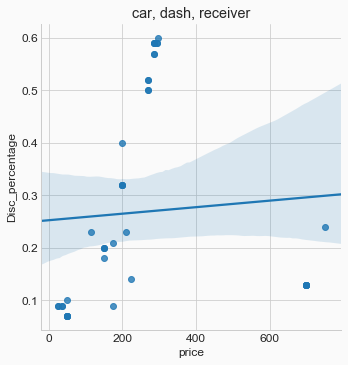

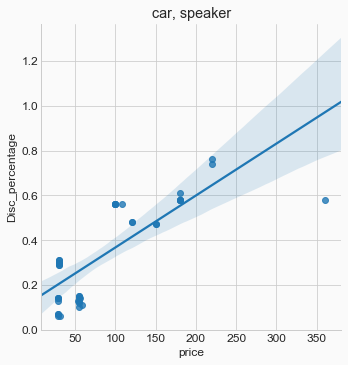

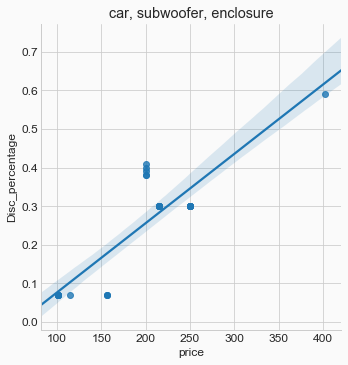

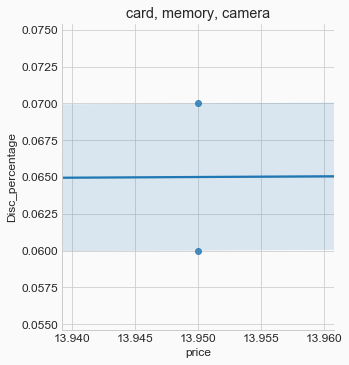

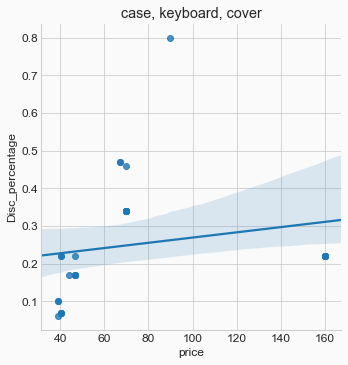

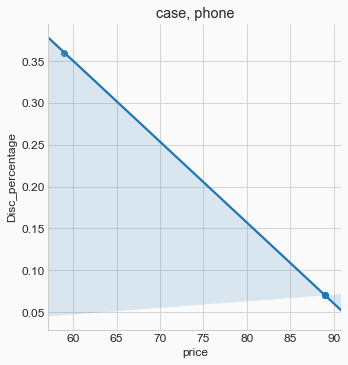

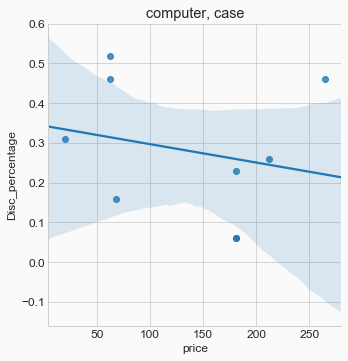

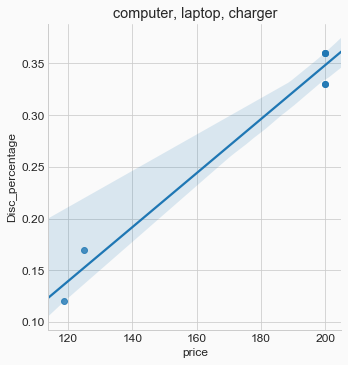

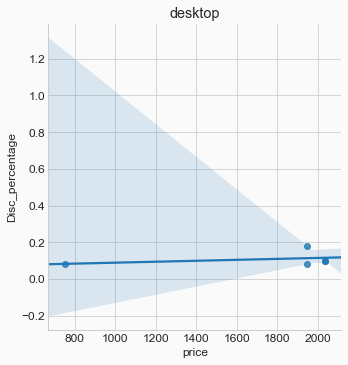

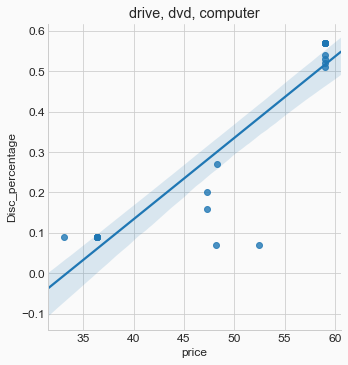

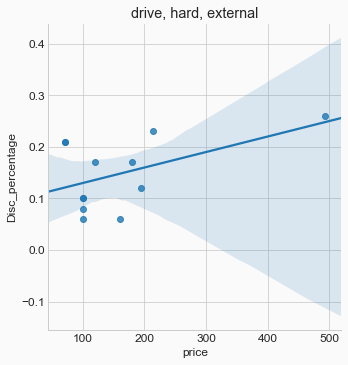

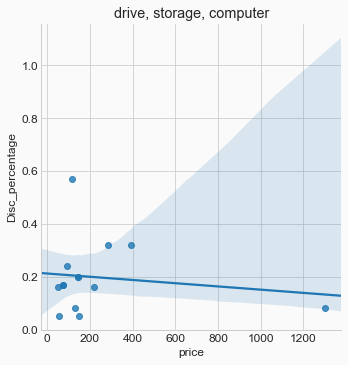

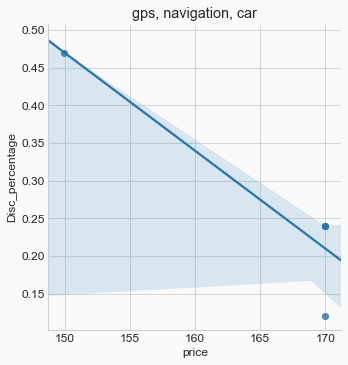

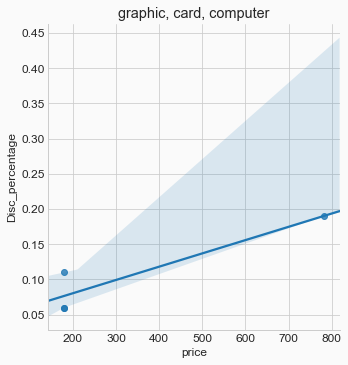

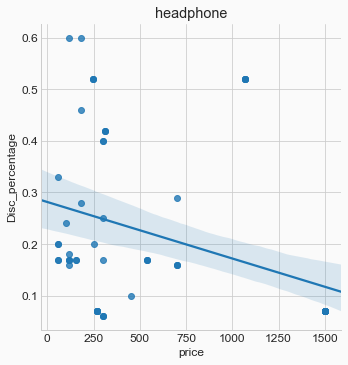

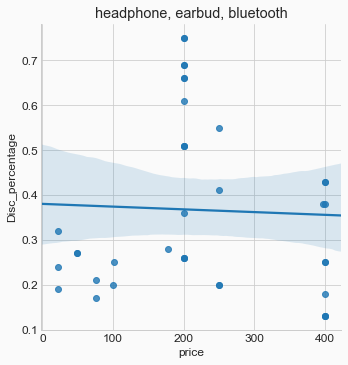

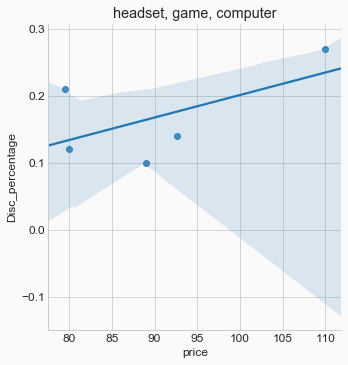

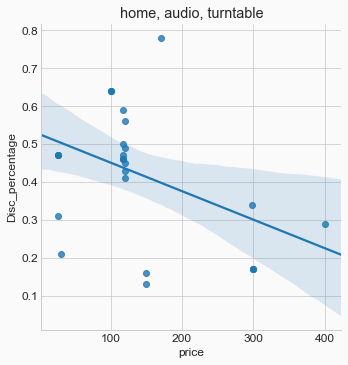

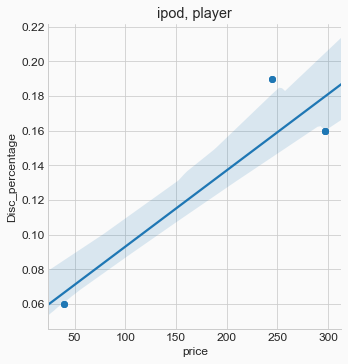

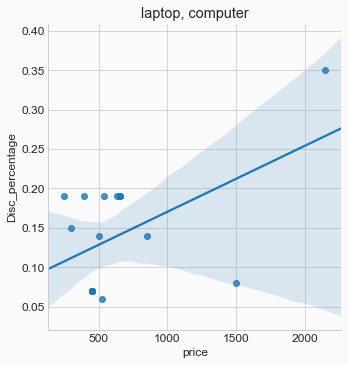

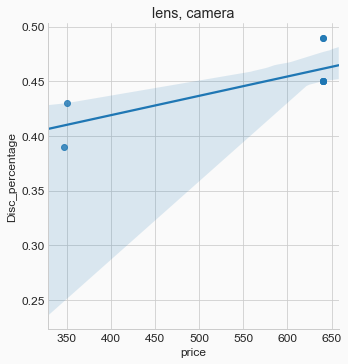

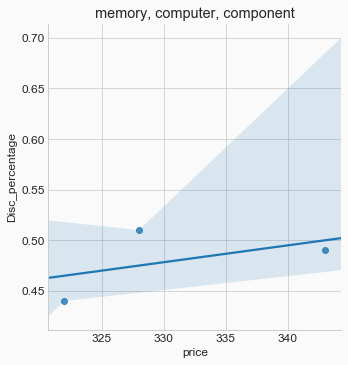

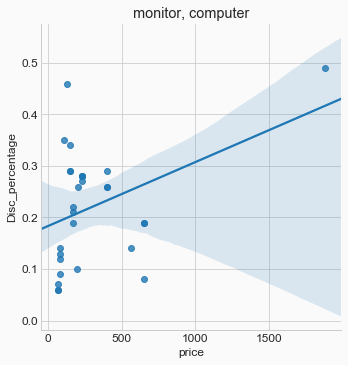

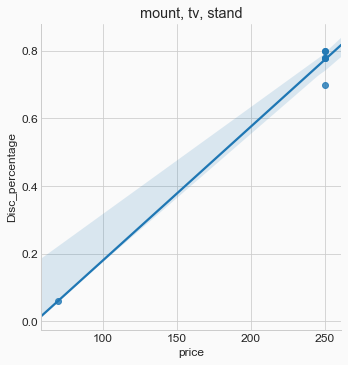

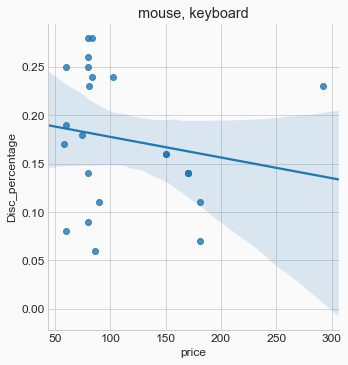

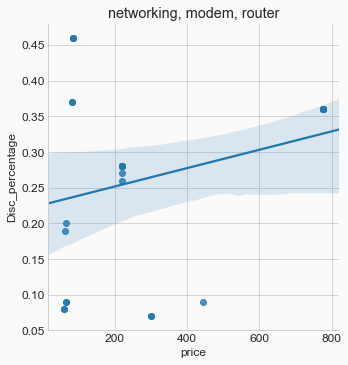

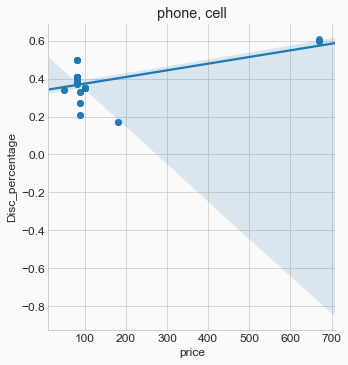

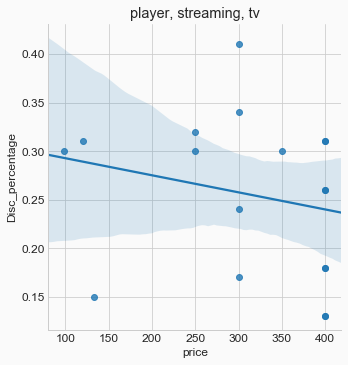

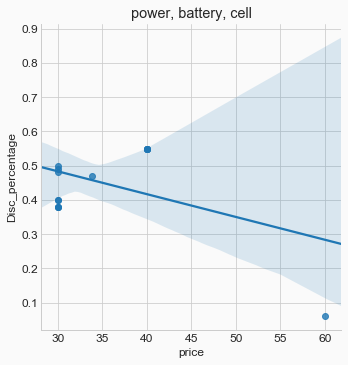

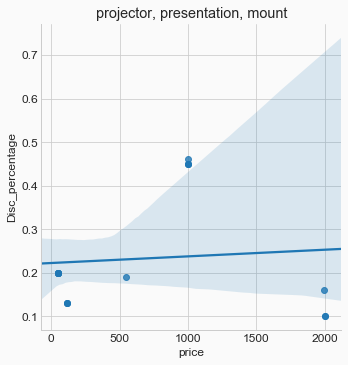

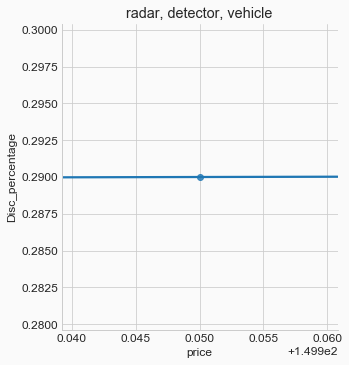

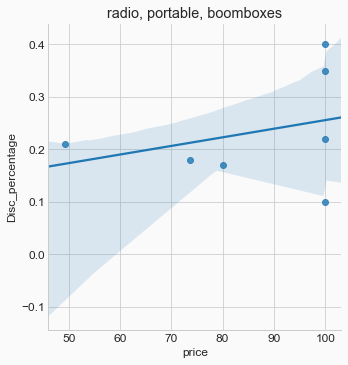

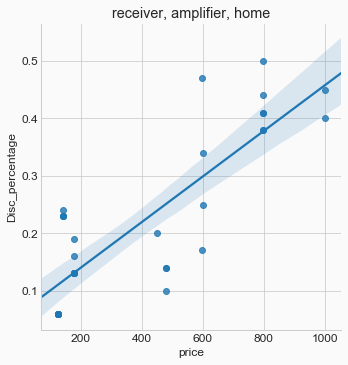

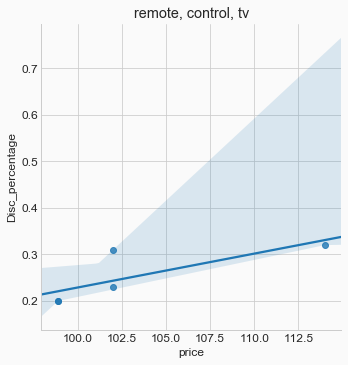

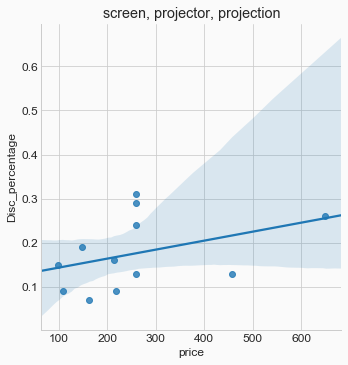

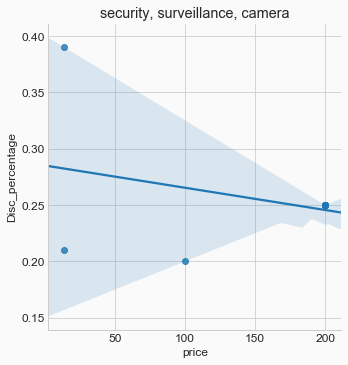

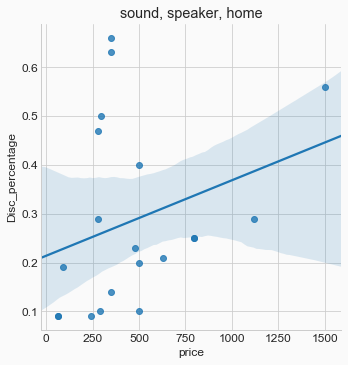

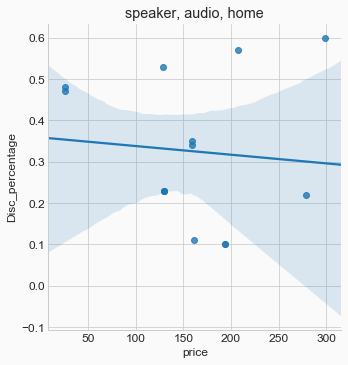

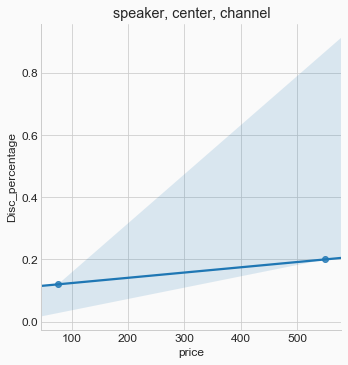

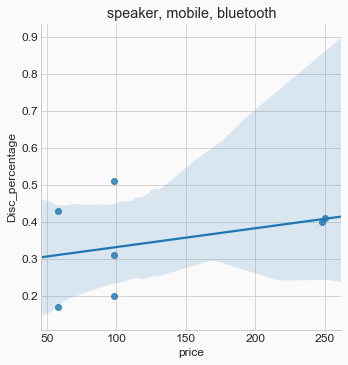

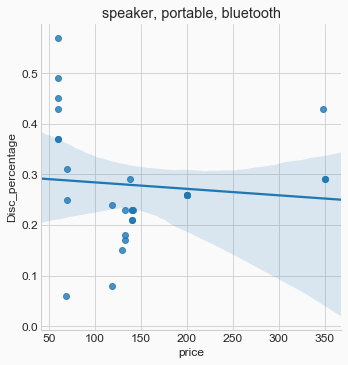

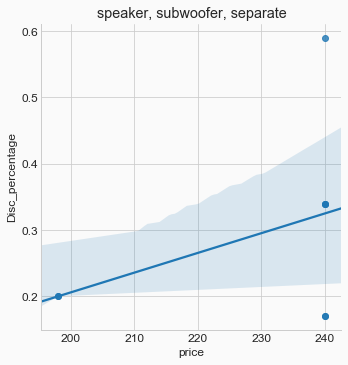

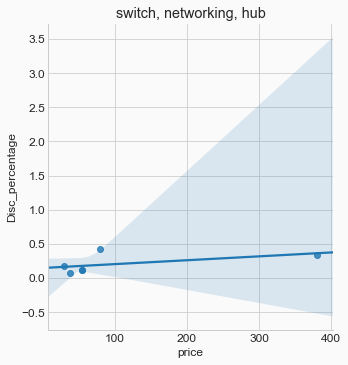

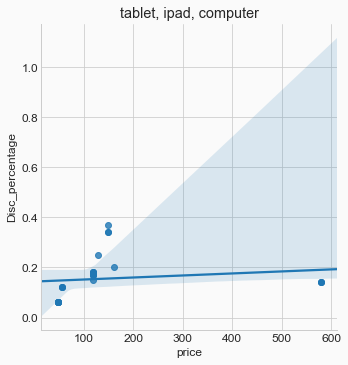

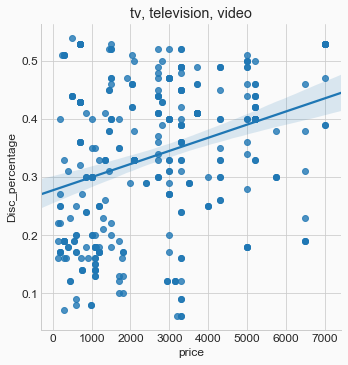

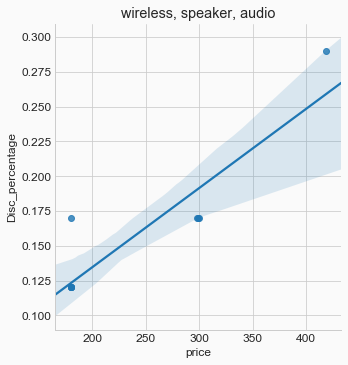

In [83]:
plot_number = 1
for cluster_name, selection in disc_df.groupby('Category_name'):
    #ax = plt.subplot(15, 4, plot_number)
    sns.lmplot(x="price", y="Disc_percentage", data = selection )
    ax = plt.gca()
    ax.set_title(cluster_name)
    plot_number = plot_number+1
    

#test2= sns.lmplot(x="percentile", y="Disc_percentage",  data=disc_df);

In [84]:
df_groupname = df_c.groupby('name')['Date_imp'].count().reset_index()

In [85]:
df_groupname

name  Date_imp
0     1080p Day/Night PTZ Speed Dome Camera with 5 t...        15
1                         10TB G-DRIVE with Thunderbolt        24
2                           12 MacBook (Mid 2017, Gold)        31
3                         12 MacBook (Mid 2017, Silver)        18
4          12.3 32GB Multi-Touch 2-in-1 Chromebook Plus        48
5                   120 Bulb LED Video Light (Daylight)        11
6              128GB iPod touch (Gold) (6th Generation)        37
7        128GB iPod touch (Space Gray) (6th Generation)        49
8                   13.3 MacBook Air (Mid 2017, Silver)        46
9                    14 Checkpoint Friendly Laptop Case        13
10    15-Volt 3 Amp 6.0 mm-3.0 mm AC Adapter for TOS...        14
11    15.4 MacBook Pro with Touch Bar (Late 2016, Si...        41
12    15.4 MacBook Pro with Touch Bar (Late 2016, Sp...       129
13    1500-Watt Digital Infrared Heater with Wi-Fi P...        26
14                                         1506TSA Lock        18
15        151 SE Outdoor Environmental Speakers (White)        12
16                     17.3 WE72 7RJ Mobile Workstation        18
17       1TB G-Drive Mobile Hard Drive with Thunderbolt        24
18            1TB T5 Portable Solid-State Drive (Black)        18
19        1TB WD Black Mobile OEM Hard Drive (WD10JPLX)        41
20    2) New Kicker 41KSC6934 6x9 3-Way 300 Watt Car...        24
21                                 21.5 iMac (Mid 2017)        23
22          21.5 iMac with Retina 4K Display (Mid 2017)        50
23              22 Widescreen Full HD 1080p LED Monitor        21
24    24-70mm f/2.8 GM Lens and 82mm Circular Polari...        19
25             240GB SSD Plus SATA III 2.5 Internal SSD        33
26           251 Outdoor Environmental Speakers (White)        14
27            27 iMac with Retina 5K Display (Mid 2017)        44
28       2PJ4280 - Peerless-AV Wall Mount for Tablet PC        26
29    2TB My Passport USB 3.0 Secure Portable Hard D...        34
...                                                 ...       ...
1090  ZTE Warp Elite No Contract Phone - Retail Pack...        16
1091      Zivix - puc+ Bluetooth MIDI Interface - Black        18
1092                   Zoom - H1 Handy Recorder - Black        63
1093  e1659Fwu 16 Widescreen USB 3.1 Gen 1 Powered L...        30
1094                      fr Case for Galaxy S7 (Black)         7
1095          h.ear go Wireless Speaker (Bordeaux Pink)        34
1096           h.ear go Wireless Speaker (Cinnabar Red)        34
1097            h.ear go Wireless Speaker (Lime Yellow)        36
1098          h.ear go Wireless Speaker (Viridian Blue)        33
1099                                      i.am+ BUTTONS        29
1100  iHome Rechargeable Splash Proof Stereo Bluetoo...        16
1101  iHome iBN43BC Bluetooth Stereo Dual Alarm FM C...        25
1102  iLive - ISBW216 Wireless Gnome Outdoor Speaker...        16
1103  iPL24 FM Clock Radio with Lightning Dock and U...        25
1104                iPhone 7 Smart Battery Case (Black)        10
1105  iSimple - BluStream Bluetooth Factory Radio Mo...        21
1106  iSimple - StrongHold Headrest Mount for Most 7...        15
1107  iSimple - TranzIt Bluetooth Factory Radio Modu...        30
1108  iSimple ISBC01 BluClik Bluetooth Remote Contro...        19
1109                                           inactive        29
1110  instax mini 8 Instant Film Camera and Groovy C...        97
1111    instax mini Rainbow Instant Film (10 Exposures)        54
1112       j5create - VGA to HDMI Video adapter - White        10
1113  kate spade new york - Glitter Sleeve for 13 Ap...        36
1114  kenwood pkg-mr362bt marine cd receiver with bl...         5
1115  mophie - Juice Pack External Battery Case with...         6
1116  mophie powerstation Plus Mini External Battery...        27
1117  myCharge - RAZOR PLUS USB Portable Power Bank ...        28
1118  naxa - 2.1-Channel Soundbar with 50-Watt Digit...        20
1119          sub6 100W 6

In [86]:
# Dateframe difference between one impression and the following for the same product
df_c['Imp_timediff'] = df_c.sort_values(['name','Date_imp']).groupby('name')['Date_imp'].diff()

In [87]:
df_c['Imp_timediff'][:5]

0   19 days 08:00:00
1    6 days 12:00:00
2    0 days 20:00:00
3                NaT
4   51 days 02:00:00
Name: Imp_timediff, dtype: timedelta64[ns]

In [88]:
#xvalues = [2,3,4,6]

#for x in xvalues:
   # plt.axvline(x,color='b',label='xvalues')
#plt.legend()

In [89]:
#labelslist = []
#for l,s in zip(week,l_percentage):
 #   labelslist.append('%s, %1.1f %%' % (l, s))

In [90]:
#Plot 
import statsmodels.api as sm

In [91]:
d = {'count': 'prod.count','nunique':'prod.nunique','median':'price.median','mean':'price.mean'}

seasonal_price= df_c.groupby('Date_imp_d').agg({'name':['count','nunique'], 'price':['median','mean']}).rename(columns=d)
seasonal_price.columns = seasonal_price.columns.droplevel(0)

#seasonal_price.index = pd.to_datetime(seasonal_price.index, unit='D')
#psampled = seasonal_price.resample('D')
print((seasonal_price))

ValueError: Grouper for 'Date_imp_d' not 1-dimensional

In [ ]:
#print(days)

In [ ]:
seasonal_price.index = pd.DatetimeIndex(freq = 'D', start='2017/01/05' ,periods = 270)
sm_graph = sm.tsa.seasonal_decompose(seasonal_price['prod.count'])
sm_graph.plot()
plt.show()

In [ ]:
pivot_spaguetti = b_imp.pivot(index='month', columns='merchant', values='name')

In [ ]:
pivot_spaguetti 